# <center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
</center>

### Integrantes: Manuel Calle - Gabriel Tagle - Agustina Navarro

<h1> Práctico I - Estadística </h1>
<h3> Análisis y Visualización de Datos - 2019 </h3>

Durante este práctico vamos a trabajar sobre el dataset [Human Freedom Index 2018](https://www.cato.org/human-freedom-index-new) de el instituto Cato. Este índice mide en detalle lo que entendemos como libertad, utilizando 79 indicadores de libertad personal y económica en distintos aspectos, hasta obtener un hermoso numerito del 1 al 10. Usaremos una [versión ya limpia del dataset](https://www.kaggle.com/gsutters/the-human-freedom-index/home) que pueden descargar desde Kaggle.

Las variables más importantes sobre las que trabaja el dataset son:

* Rule of Law
* Security and Safety
* Movement
* Religion
* Association, Assembly, and Civil Society
* Expression and Information
* Identity and Relationships
* Size of Government
* Legal System and Property Rights
* Access to Sound Money
* Freedom to Trade Internationally
* Regulation of Credit, Labor, and Business

Nosotros centrarermos nuestro análisis en variables relacionadas a *Identity and Relationships* en paises de Latinoamérica, y los compararemos con las estadísticas globales. La pregunta a responder es simple: **¿Qué niveles de libertad se viven en Latinoamérica, especificamente en cuanto libertades de indentidad?**. Sin embargo, para hacer un análisis de los datos tenemos que platear también estas sub preguntas:

1. ¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
2. ¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
3. En este estudio, la libertad se mide con dos estimadores principales: *hf_score* que hace referencia a Human Freedom, y *ef_score* que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?

Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.

In [3]:
import matplotlib.pyplot as plt
import numpy
import pandas
import seaborn
from scipy import stats

In [7]:
seaborn.__version__

'0.9.0'

In [4]:
# Agregamos el path del archivo en una variable
path = 'C:/Users/Agustina-Notebook/Documents/DiploDatos/Repopracticos/diplodatosAnalisisYVisualizacion/datasets/'
dataset = pandas.read_csv(path+'hfi_cc_2018.csv')
dataset.shape

(1458, 123)

In [5]:
dataset.columns  # Way too many columns!

Index(['year', 'ISO_code', 'countries', 'region', 'pf_rol_procedural',
       'pf_rol_civil', 'pf_rol_criminal', 'pf_rol', 'pf_ss_homicide',
       'pf_ss_disappearances_disap',
       ...
       'ef_regulation_business_bribes', 'ef_regulation_business_licensing',
       'ef_regulation_business_compliance', 'ef_regulation_business',
       'ef_regulation', 'ef_score', 'ef_rank', 'hf_score', 'hf_rank',
       'hf_quartile'],
      dtype='object', length=123)

Por suerte las columnas tienen un prefijo que nos ayuda a identificar a qué sección pertenecen. Nos quedamos sólo con las que comienzan con *pf_indentity*, junto con otras columnas más generales

In [6]:
important_cols = ['year', 'ISO_code', 'countries', 'region']

important_cols += [col for col in dataset.columns if 'pf_identity' in col]

important_cols += [
    'ef_score', # Economic Freedom (score)
    'ef_rank', # Economic Freedom (rank)
    'hf_score', # Human Freedom (score)
    'hf_rank', # Human Freedom (rank)
]

important_cols2 = ['year', 'countries', 'region','pf_identity','ef_score','hf_score']

In [6]:
dataset[important_cols]

,year,ISO_code,countries,region,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
0,2016,ALB,Albania,Eastern Europe,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,7.54,34.0,7.568140,48.0
1,2016,DZA,Algeria,Middle East & North Africa,NaN,0.0,5.0,2.5,0.0,0.0,0.0,0.0,0.833333,4.99,159.0,5.135886,155.0
2,2016,AGO,Angola,Sub-Saharan Africa,10.0,10.0,10.0,10.0,0.0,0.0,0.0,10.0,7.500000,5.17,155.0,5.640662,142.0
3,2016,ARG,Argentina,Latin America & the Caribbean,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,4.84,160.0,6.469848,107.0
4,2016,ARM,Armenia,Caucasus & Central Asia,7.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,8.000000,7.57,29.0,7.241402,57.0
5,2016,AUS,Australia,Oceania,7.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,9.250000,7.98,10.0,8.582219,4.0
6,2016,AUT,Austria,Western Europe,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.000000,7.58,27.0,8.413474,16.0
7,2016,AZE,Azerbaijan,Caucasus & Central Asia,0.0,10.0,10.0,10.0,10.0,10.0,10.0,5.0,6.250000,6.49,106.0,6.083277,130.0
8,2016,BHS,Bahamas,Latin America & the Caribbean,NaN,10.0,10.0,10.0,10.0,10.0,10.0,NaN,10.000000,7.34,49.0,7.397269,50.0
9,2016,BHR,Bahrain,Middle East & North Africa,NaN,0.0,0.0,0.0,10.0,10.0,10.0,0.0,3.333333,7.56,30.0,6.848035,75.0


## 1. Estadísticos descriptivos

  1. Para comenzar con un pantallazo de los datos, calcular el rango de las variables.
  2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 
  3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?
  4. ¿Cómo pueden sanearse los valores faltantes?
  5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?
  
  

#### 1. 1. Rango de las variables.

In [21]:
dataset[important_cols].describe()

,year,pf_identity_legal,pf_identity_parental_marriage,pf_identity_parental_divorce,pf_identity_parental,pf_identity_sex_male,pf_identity_sex_female,pf_identity_sex,pf_identity_divorce,pf_identity,ef_score,ef_rank,hf_score,hf_rank
count,1458.000000,205.000000,923.000000,923.000000,1358.000000,1375.000000,1378.000000,1378.000000,585.000000,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,2012.000000,6.307317,7.248104,7.632719,7.428203,6.709091,7.935414,7.325835,7.538462,7.334180,6.785610,76.973149,6.993444,77.007983
std,2.582875,3.635095,3.953387,3.689772,3.705913,4.683089,4.028877,4.048606,3.644142,3.159473,0.883601,44.540142,1.025811,44.506549
min,2008.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.880000,1.000000,3.765827,1.000000
25%,2010.000000,7.000000,5.000000,5.000000,5.000000,0.000000,10.000000,5.000000,5.000000,5.000000,6.250000,38.000000,6.336685,39.000000
50%,2012.000000,7.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.166667,6.900000,77.000000,6.923840,76.000000
75%,2014.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,7.410000,115.000000,7.894660,115.000000
max,2016.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,9.190000,162.000000,9.126313,162.000000


Por medio del rango de las variables podemos deducir que los datos fueron tomados en 8 años desde el 2008, cada pf_identity cumple con la escala de 0 a 10. Los ranks categorizan ordinalmente a los 162 paises. 
Hay variables discretas como pf_identity_divorce y los ranks; pero pf_identity y los score tienen valores continuos, de modo que podemos decir que se calculan como el promedio de las demas variables.

A modo de obtener mas informacion a cerca de los datos contabilizamos la cantidad de registros  por cada region, para tener una idea del universo con el cual estamos trabajando y cuales son las sub muestras o grupos que podemos detectar, que pueden influir en alguna tendencia de las variables.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

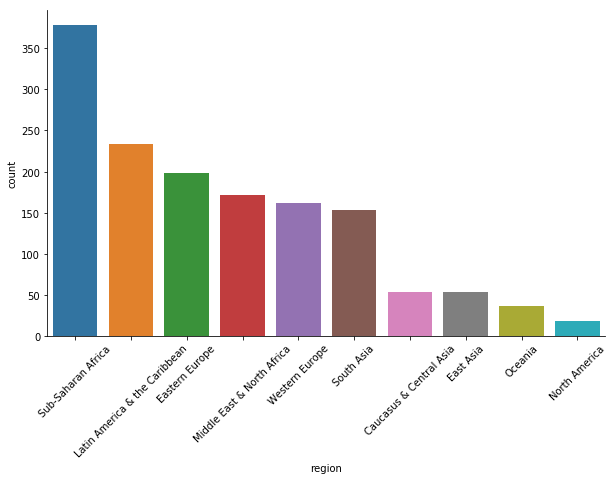

In [63]:
plt.figure(figsize=(10,6))
seaborn.countplot(data=dataset, x='region', order = dataset['region'].value_counts().index)
seaborn.despine()
plt.xticks(rotation=45)

#### 1. 2. Obtener media, mediana y desviación estándar de las variables *pf_identity* y *hf_score* en el mundo y compararla con la de Latinoamérica y el caribe. ¿Tiene sentido calcular la moda? 

In [7]:
dsmean=dataset[['pf_identity', 'hf_score']].mean()
dsstd=dataset[['pf_identity', 'hf_score']].std()
dsmedian=dataset[['pf_identity', 'hf_score']].median()

#creo dataset de la region latina
datasetlatin=dataset[(dataset.region=='Latin America & the Caribbean')]
dsmeanLatin=datasetlatin[['pf_identity', 'hf_score']].mean()
dsstdLatin=datasetlatin[['pf_identity', 'hf_score']].std()
dsmedianLatin=datasetlatin[['pf_identity', 'hf_score']].median()

ds = pandas.concat([dsmean,dsmedian,dsstd,dsmeanLatin,dsmedianLatin,dsstdLatin], axis=1)
ds = ds.rename(columns = {0:'Mean',2:'Std',1:'Median',3:'Mean LatAm',5:'Std LatAm',4:'Median LatAm'})
ds

,Mean,Median,Std,Mean LatAm,Median LatAm,Std LatAm
pf_identity,7.334180,9.166667,3.159473,8.765086,10.000000,1.711732
hf_score,6.993444,6.923840,1.025811,7.047982,7.028045,0.608904


No tiene sentido calcular la Moda, ya que la **mediana** nos está orientando hacia el valor que mas veces ocurrió. El pf_identity tiene una mediana de 9 global y 10 en Latinoamerica, lo  que nos dice que si ordenamos todos los valores obtenidos el del medio es entre 9 y 10 y por el rango, sabemos que el maximo valor es 10, por lo que deducimos cual es el valor de la moda facilmente. 
El ef_score junto al pf_identity servirian para de alguna manera obtener el hf_score.
Se podrian sanear haciendo los valores faltantes iguales a la media?

A continuación para un analisis mas en profundidad realizaremos los mismmos calculos por regiones

In [57]:
dsmeanReg = dataset.groupby(['region']).mean()
dsstdReg = dataset.groupby(['region']).std()
dsmedianReg = dataset.groupby(['region']).median()
dsReg = pandas.concat([dsmeanReg,dsmedianReg,dsstdReg], axis=1)
dsReg = dsReg[['pf_identity', 'hf_score']].reset_index(['region'])
dsReg = dsReg.rename(columns = {'pf_identity':'PF_Mean','pf_identity':'pf_Median','pf_identity':'pf_Std','hf_score':'HF_Mean','hf_score':'HF_Median','hf_score':'HF_Std'})
dsReg.columns = ['region','PF_Mean','PF_Median','PF_Std','HF_Mean','HF_Median','HF_Std']

dsReg

,region,PF_Mean,PF_Median,PF_Std,HF_Mean,HF_Median,HF_Std
0,Caucasus & Central Asia,8.714744,8.333333,1.429093,6.879506,6.766759,0.577477
1,East Asia,9.861111,10.000000,0.294071,7.813020,8.109151,0.947502
2,Eastern Europe,9.683333,10.000000,0.768090,7.671637,7.814029,0.554830
3,Latin America & the Caribbean,8.765086,10.000000,1.711732,7.047982,7.028045,0.608904
4,Middle East & North Africa,2.830000,2.500000,3.165090,6.051464,6.289613,0.906600
5,North America,9.833333,10.000000,0.320844,8.461915,8.484161,0.176386
6,Oceania,9.152778,10.000000,1.415826,7.858762,8.033486,0.915284
7,South Asia,5.735294,5.833333,3.302767,6.533740,6.585634,0.697855
8,Sub-Saharan Africa,5.567050,5.000000,2.445204,6.256850,6.276072,0.694003
9,Western Europe,9.871399,10.000000,0.327340,8.368293,8.398904,0.219079


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

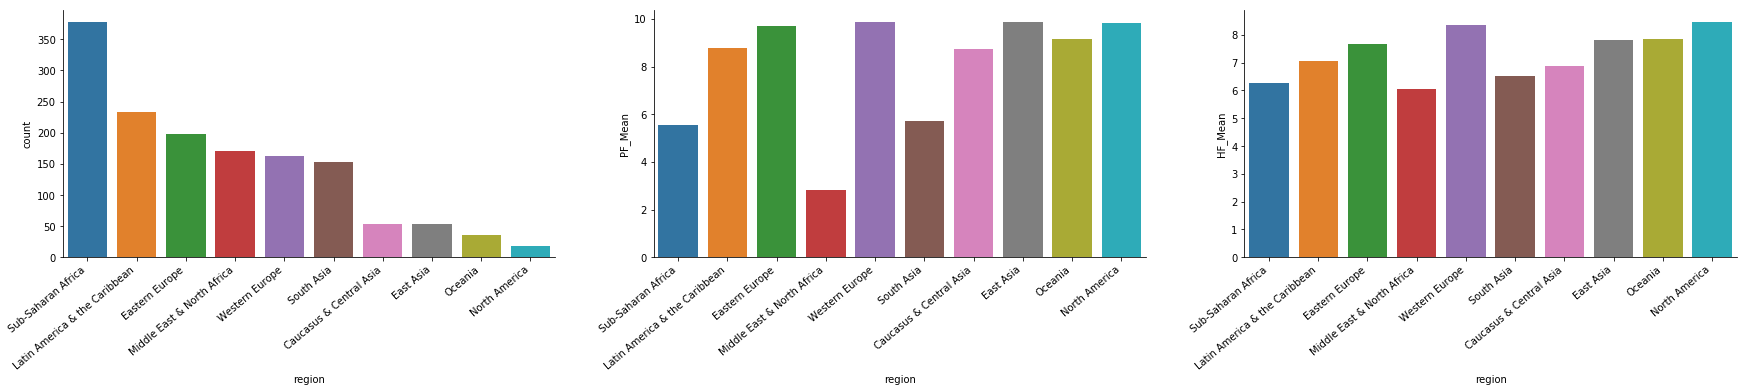

In [82]:
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.countplot(data=dataset, x='region', order = dataset['region'].value_counts().index)
seaborn.despine()
plt.xticks(rotation=40,ha='right')
plt.subplot2grid((2,3),(0,1))
seaborn.barplot(data=dsReg, y='PF_Mean',x='region',order = dataset['region'].value_counts().index)
seaborn.despine()
plt.xticks(rotation=40, ha='right')
plt.subplot2grid((2,3),(0,2))
seaborn.barplot(data=dsReg, y='HF_Mean',x='region',order = dataset['region'].value_counts().index)
seaborn.despine()
plt.xticks(rotation=40, ha='right')

Con estos graficos podemos ver que el tamaño de los subgrupos por regiones no afecta en los niveles de libertad y la region mas grande tiene niveles de libertad personal muy bajo. 
Pero lo importante es que el volumen de los datos no afecta las medias de las variables.

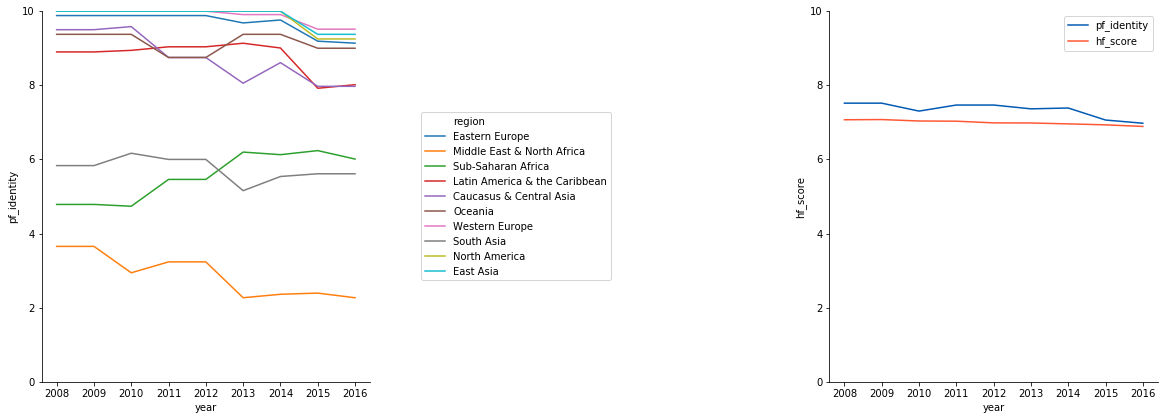

In [105]:
fig = plt.figure(figsize=(20,15))
plt.subplot2grid((2,3),(0,0))
seaborn.lineplot(data=dataset,x='year', y='pf_identity',color='#0059b3',hue="region",ci=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=1, borderaxespad=0.)
plt.ylim(0, 10)
# Put a legend to the right side
plt.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)
seaborn.despine()
plt.subplot2grid((2,3),(0,2))
seaborn.lineplot(data=dataset,x='year', y='pf_identity',color='#0059b3',ci=None)
seaborn.lineplot(data=dataset,x='year', y='hf_score',color='#ff5733',ci=None)
plt.legend(('pf_identity', 'hf_score'),prop = {'size':10}, loc = 'upper right')
plt.ylim(0, 10)
seaborn.despine()

#### 1. 3. ¿Son todos los valores de *pf_identity*  y *hf_score* directamente comparables? ¿Qué otra variable podría influenciarlos?

En el gráfico de ambas variables en el tiempo agrupadas por región podemos ver que no existen valores que generen ruido. La variable hf_score es menos variable a lo largo del tiempo en cambio pf_identity presenta mayores variaciones a lo largo del paso de los años. Ambas variables tienden al mismo punto, si analizamos una variable mas como es la EF_SCORE..

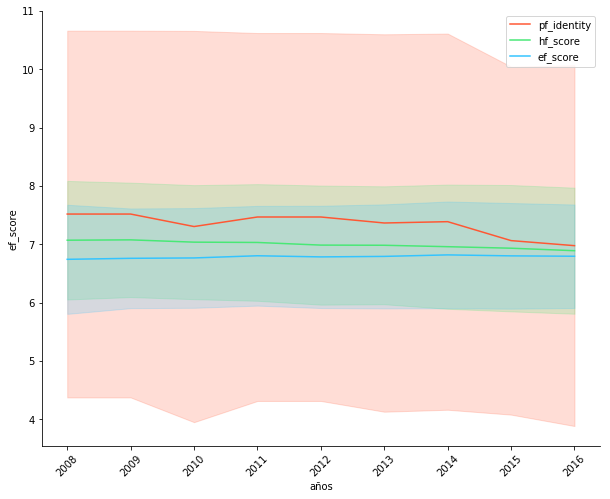

In [122]:
plt.figure(figsize=(10,8))
seaborn.lineplot(data=dataset, x='year', y='pf_identity',  ci='sd',  markers='v',   color="#ff5733")
seaborn.lineplot(data=dataset, x='year', y='hf_score',  ci='sd',   markers='v',    color="#48e876")
seaborn.lineplot(data=dataset, x='year', y='ef_score',  ci='sd',   markers='v',    color="#33C4FF")

plt.xlabel('años')
plt.xticks(rotation=45)
plt.legend(('pf_identity', 'hf_score','ef_score'),prop = {'size':10}, loc = 'upper right')
seaborn.despine()


Con este grafico podemos ver que la variable EF_score, que mide la libertad economica tiene la misma tendencia que HF_SCORE y similares franjas de desviacion de los datos. Y por otro lado la pf_identity tiene una mas grande desviacion de los datos y picos mas pronunciados que se manifiestan muy suavemente en la curva de Hf_score.
Es por ello que podemos deducir que la pf_identity acompañada de la ef_score calculan la hf_score, lo cual tiene sentido, ya que la libertad personal en conjunto con la libertad economica hacen a la libertad humana. Por otro lado la libertad personal esta influenciada por muchos factores dispares y con gran variabilidad como son lo civil, ideologico, de genero, etc. Por eso cobra sentido la variabilidad de la curva. Por otro lado la curva de la libertad economica esta influenciada por el ambito economico que a nivel global se mantiene estable con una pequeña pendiente creciente.

In [139]:
dataset[['year', 'countries', 'region','pf_identity','ef_score','hf_score']][dataset.year==2008]

,year,countries,region,pf_identity,ef_score,hf_score
1296,2008,Albania,Eastern Europe,7.5,7.22,7.498849
1297,2008,Algeria,Middle East & North Africa,0.0,5.16,5.153065
1298,2008,Angola,Sub-Saharan Africa,2.5,4.41,4.823528
1299,2008,Argentina,Latin America & the Caribbean,10.0,5.88,7.035120
1300,2008,Armenia,Caucasus & Central Asia,10.0,7.59,7.455280
1301,2008,Australia,Oceania,10.0,8.08,8.686020
1302,2008,Austria,Western Europe,10.0,7.70,8.363703
1303,2008,Azerbaijan,Caucasus & Central Asia,7.5,6.15,6.371672
1304,2008,Bahamas,Latin America & the Caribbean,10.0,7.58,7.863355
1305,2008,Bahrain,Middle East & North Africa,5.0,7.42,7.100119


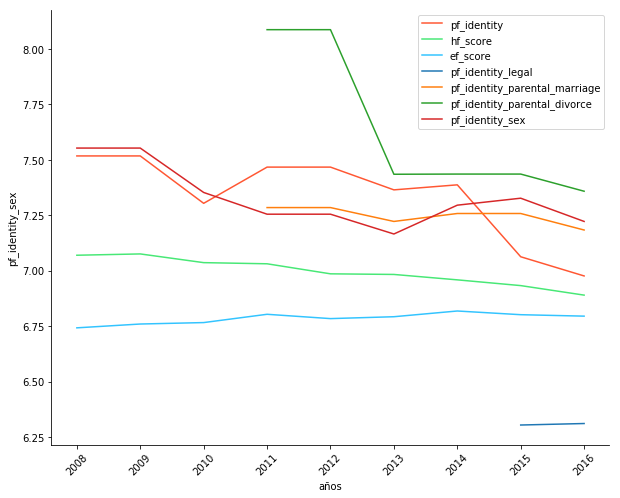

In [129]:
plt.figure(figsize=(10,8))
seaborn.lineplot(data=dataset, x='year', y='pf_identity',  color="#ff5733", ci=None)
seaborn.lineplot(data=dataset, x='year', y='hf_score',   color="#48e876", ci=None)
seaborn.lineplot(data=dataset, x='year', y='ef_score',  color="#33C4FF", ci=None)

seaborn.lineplot(data=dataset, x='year', y='pf_identity_legal', ci=None)
seaborn.lineplot(data=dataset, x='year', y='pf_identity_parental_marriage', ci=None)
seaborn.lineplot(data=dataset, x='year', y='pf_identity_parental_divorce', ci=None)
seaborn.lineplot(data=dataset, x='year', y='pf_identity_sex', ci=None)


plt.xlabel('años')
plt.xticks(rotation=45)
plt.legend(('pf_identity', 'hf_score','ef_score','pf_identity_legal','pf_identity_parental_marriage',
            'pf_identity_parental_divorce','pf_identity_sex'),prop = {'size':10}, loc = 'upper right')
seaborn.despine()

En este grafico podemos ver todas las variables que componen al calculo de pf_identity, y vemos que hay curvas que comienzan en la mitad del eje x, lo que significa que faltan datos para los años anteriores o que la lucha por la libertad de genero comenzo en el 2011 por ejemplo. Para evitar estas posibles distorsiones vamos a evaluar si conviene reemplazar por 0 los valores faltantes o eliminarlos.

#### 1. 4. ¿Cómo pueden sanearse los valores faltantes?

Los valores de la muestra se curan, eliminando las filas con valores nulos, ya que por ser variables ordinales numericas, no se le puede asignar 0 a valores NaN, porque distorsionaria la tendencia y el analisis.

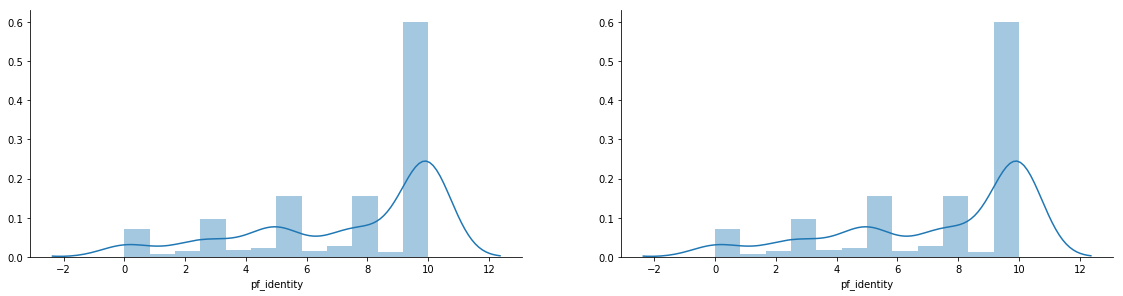

In [193]:
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(dataset['pf_identity'].dropna())
seaborn.despine()
plt.subplot2grid((2,3),(0,1))
seaborn.distplot(dataset['pf_identity'].dropna(0))
seaborn.despine()

#### 1. 5. ¿Encuentra outliers en estas dos variables? ¿Qué método utiliza para detectarlos? ¿Los outliers, son globales o por grupo? ¿Los eliminaría del conjunto de datos?

Para detectar los outliers se deben presentar los valores obtenidos en un histograma para poder ver si hubi algun valor raro, que desvia la curva. En este caso que hemos analizado son por grupo, ya que globalmente se obtienen valores dentro del rango de los valores validos, entre 0 y 10.
Pero si hacemos la comparacion con Latinoamerica, vemos unos valores fuera de la normal.


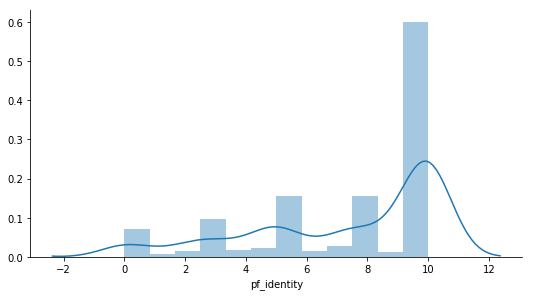

In [194]:
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(dataset['pf_identity'].dropna())
seaborn.despine()

Con este grafico podemos ver que la distribucion concentra todos los valores en el valor 10, ya que este fue el valor con mayor frecuencia. POr otro lado debemos ver los pocos valores a la izquierda de la curva que me ensucian la curva de la posible distribucion normal. En primer lugar veificamos cuantos valores hay despues del 0 y del 10, ya que la curva nos muestra esta desviacion. Si contabilizamos esos valores y evaluamos que hacer con ellos, deducimos lo siguiente: 

In [151]:
dataset[dataset['pf_identity'] < 0].shape[0]

0

In [152]:
dataset[dataset['pf_identity'] > 10].shape[0]

0

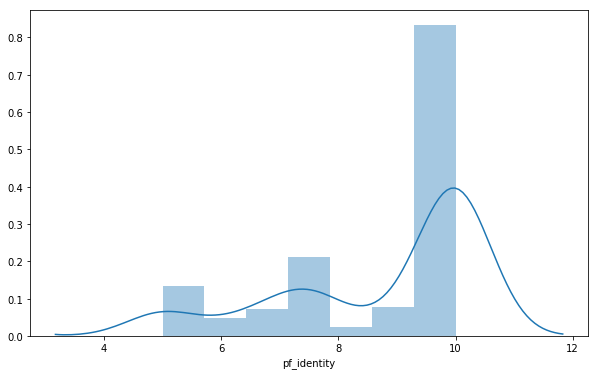

In [157]:
datos_la_pf = dataset[dataset['region']=='Latin America & the Caribbean']
plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_pf['pf_identity'].dropna(0))

Si graficamos para Latinoamerica tambien vemos algunso valores chicos pero descartamos que hayan valores que distorsionen la muestra.

In [155]:
datos_la_pf[datos_la_pf['pf_identity'] > 10].shape[0]

0

In [156]:
datos_la_pf[datos_la_pf['pf_identity'] < 5].shape[0]

0

Graficamos el histogramam de HF_score 

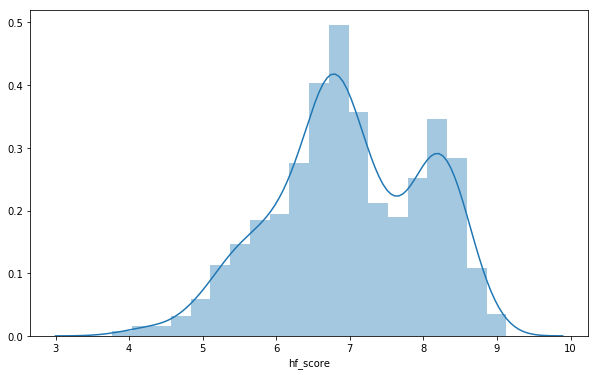

In [171]:
plt.figure(figsize=(10,6))
seaborn.distplot(dataset['hf_score'].dropna())

In [172]:
dataset[dataset['hf_score'] > 10].shape[0]

0

In [173]:
dataset[dataset['hf_score'] < 4].shape[0]

2

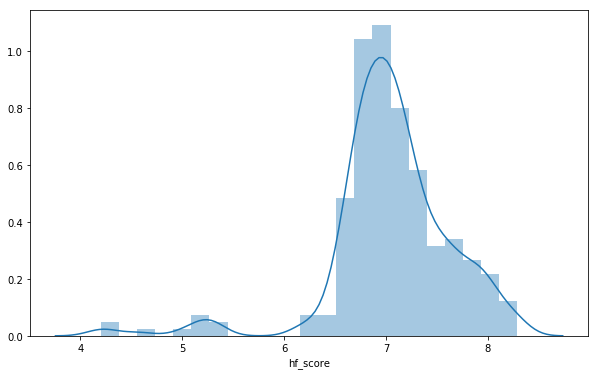

In [174]:
plt.figure(figsize=(10,6))
seaborn.distplot(datasetlatin['hf_score'].dropna())

In [177]:
datasetlatin.shape[0]

234

In [179]:
datasetlatin[datasetlatin['hf_score'] < 6].shape[0]

9

Con esto vemos que los valores que estan luego del 6 son solo  9 y no son representativos para lo que estamos midiendo, comparado con la cantidad de datos. Por ello los vamos a eliminar para comparar si la distribucion es normal

In [181]:
datos_la_hf_score = datasetlatin['hf_score']
# Eliminar filas a más de 2.5 desviaciones estándares de la media
mask_datos_la_hf_cor = numpy.abs(datos_la_hf_score-datos_la_hf_score.mean()) <= (2.5*datos_la_hf_score.std())
datos_la_hf_score_corr = datos_la_hf_score[mask_datos_la_hf_cor]
print("Filas removidas", datos_la_hf_score.count() - datos_la_hf_score_corr.count())
print("Hr_score máximo considerado", datos_la_hf_score_corr.max())

Filas removidas 9
Hr_score máximo considerado 8.290152327000001


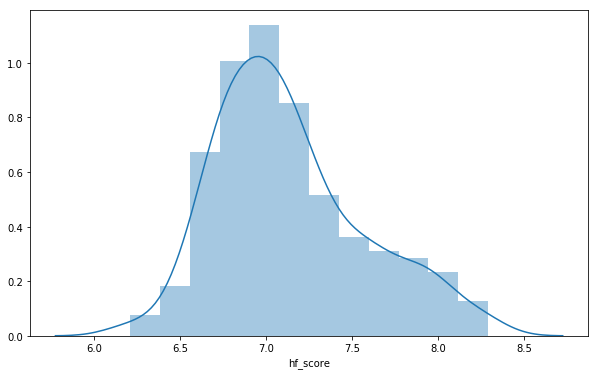

In [182]:
plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_hf_score_corr.dropna())

Verificamos si los valores mas altos tienen algun valor raro

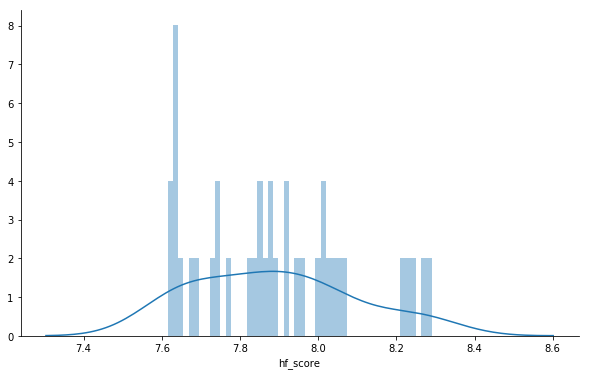

In [183]:
plt.figure(figsize=(10,6))
seaborn.distplot(datos_la_hf_score_corr[datos_la_hf_score_corr > 7.6], bins=50)
seaborn.despine()

In [184]:
datos_la_hf_score_corr[datos_la_hf_score_corr > 7.5]

31      8.008018
36      7.857714
114     7.647620
117     7.575393
156     7.728071
193     8.027501
198     7.882654
276     7.638484
279     7.615037
318     7.770347
355     8.017589
360     8.058857
438     7.583918
441     7.547980
480     7.736980
517     7.994038
522     7.856514
600     7.549042
642     7.876803
656     7.580937
679     8.219911
684     7.890738
762     7.534258
765     7.630991
804     7.959078
818     7.631374
841     8.290152
846     7.919855
927     7.683067
966     8.041428
980     7.637069
1003    8.271367
1008    7.682004
1089    7.619559
1128    8.073788
1142    7.745258
1165    8.249136
1170    7.817826
1248    7.518632
1251    7.541655
1290    7.925409
1304    7.863355
1327    8.227215
1332    7.832944
1452    7.947847
Name: hf_score, dtype: float64

Evaluando la primera pregunta, de si los outliers eran globales o por regiones, vimos que globalmente no se veia nungun valor raro, pero si por regiones, por lo que vamos a graficar los histogramas de cada una, para pf_identity y hf_score

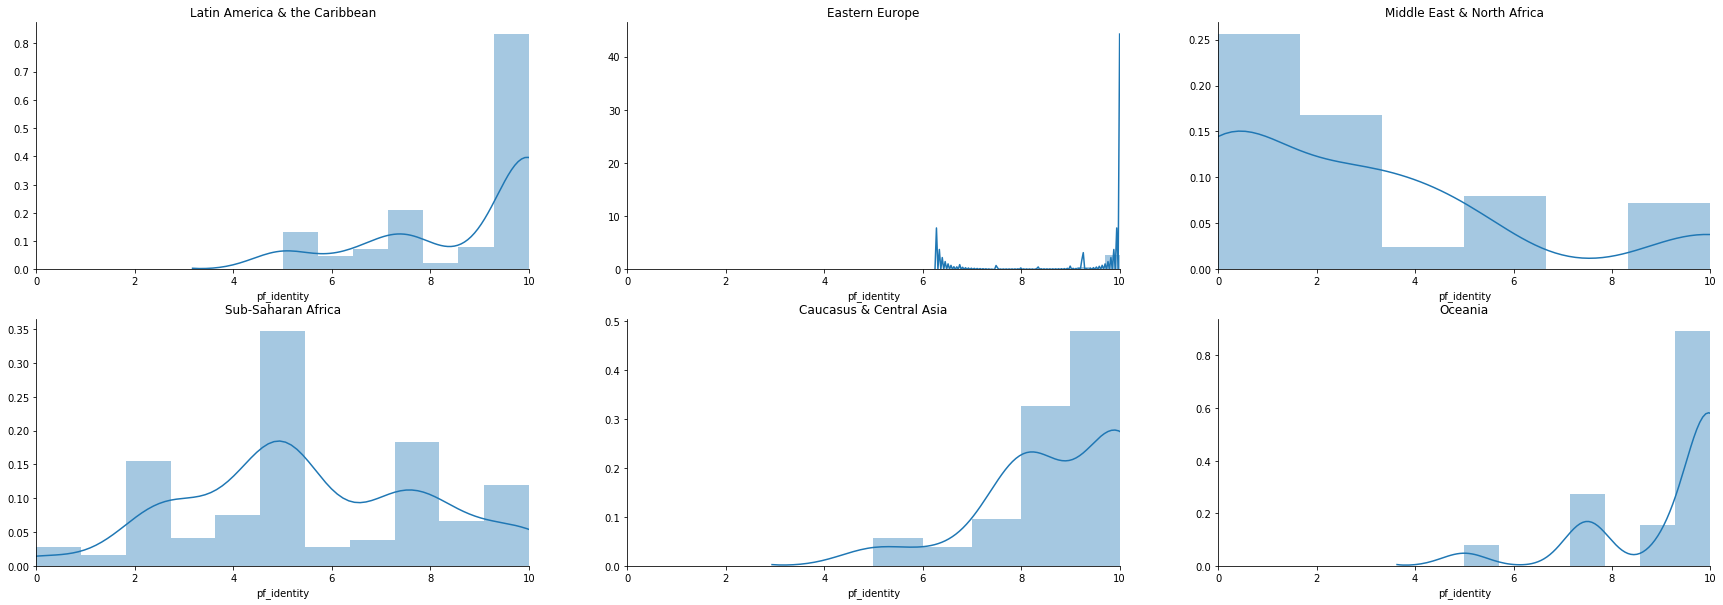

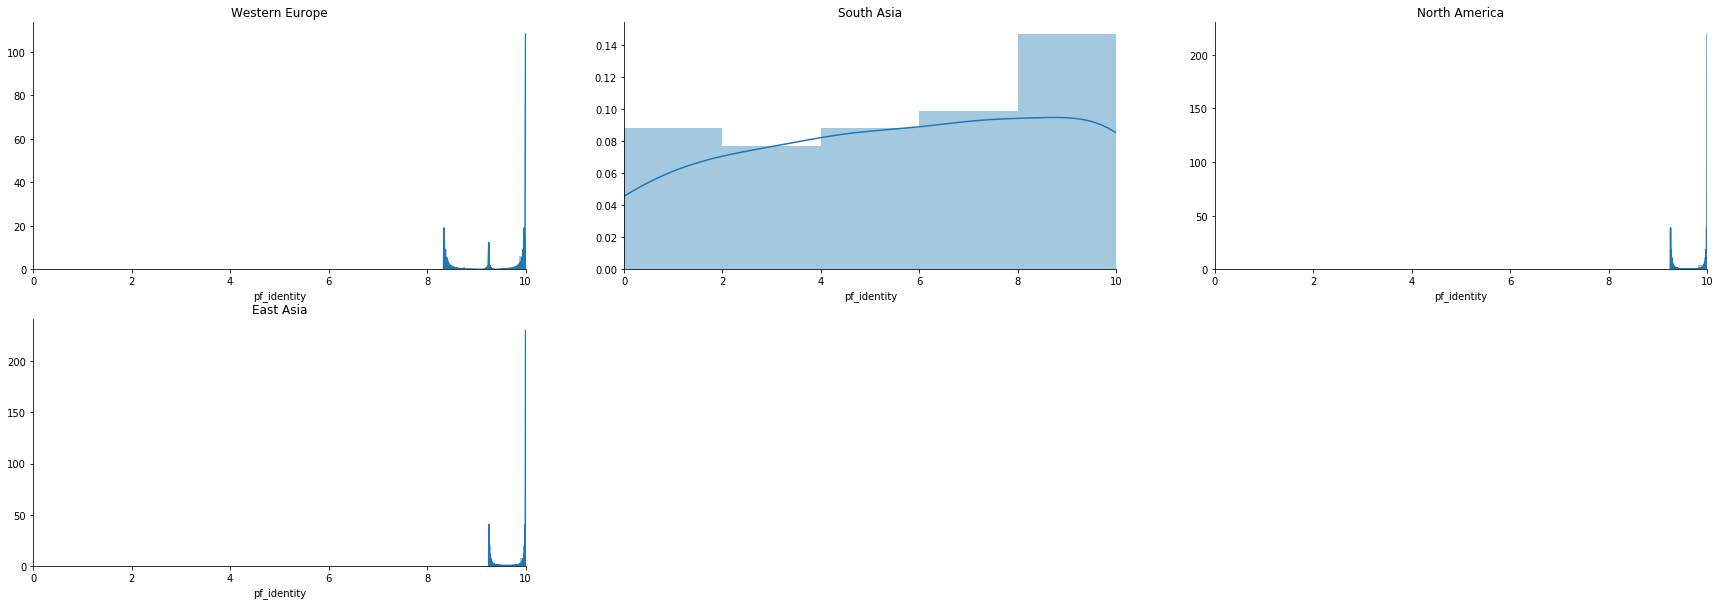

In [211]:
dsLatin=dataset[dataset['region']=='Latin America & the Caribbean']
dsEuro=dataset[dataset['region']=='Eastern Europe']
dsAf=dataset[dataset['region']=='Middle East & North Africa']
dsSSA=dataset[dataset['region']=='Sub-Saharan Africa'] 
dsCCA=dataset[dataset['region']=='Caucasus & Central Asia'] 
dsOc=dataset[dataset['region']=='Oceania'] 
dsWE=dataset[dataset['region']=='Western Europe']
dsSA=dataset[dataset['region']=='South Asia']
dsNA=dataset[dataset['region']=='North America'] 
dsEA=dataset[dataset['region']=='East Asia']
fig = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(dsLatin['pf_identity'].dropna()).set_title('Latin America & the Caribbean')
plt.xlim(0, 10)
seaborn.despine()
plt.subplot2grid((2,3),(0,1))
seaborn.distplot(dsEuro['pf_identity'].dropna(0)).set_title('Eastern Europe')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(0,2))
seaborn.distplot(dsAf['pf_identity'].dropna(0)).set_title('Middle East & North Africa')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(1,0))
seaborn.distplot(dsSSA['pf_identity'].dropna(0)).set_title('Sub-Saharan Africa')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(1,1))
seaborn.distplot(dsCCA['pf_identity'].dropna(0)).set_title('Caucasus & Central Asia')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(1,2))
seaborn.distplot(dsOc['pf_identity'].dropna(0)).set_title('Oceania')
plt.xlim(0, 10)
seaborn.despine()

fig2 = plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(dsWE['pf_identity'].dropna(0)).set_title('Western Europe')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(0,1))
seaborn.distplot(dsSA['pf_identity'].dropna(0)).set_title('South Asia')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(0,2))
seaborn.distplot(dsNA['pf_identity'].dropna(0)).set_title('North America')
plt.xlim(0, 10)
seaborn.despine()

plt.subplot2grid((2,3),(1,0))
seaborn.distplot(dsEA['pf_identity'].dropna(0)).set_title('East Asia')
plt.xlim(0, 10)
seaborn.despine()


In [224]:
"g = seaborn.FacetGrid(dataset, row="pf_identity", col="region", margin_titles=True)"
"g.map(plt.hist, color="steelblue", bins=10)"

SyntaxError: invalid syntax (<ipython-input-224-b6200fadae4b>, line 1)

## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

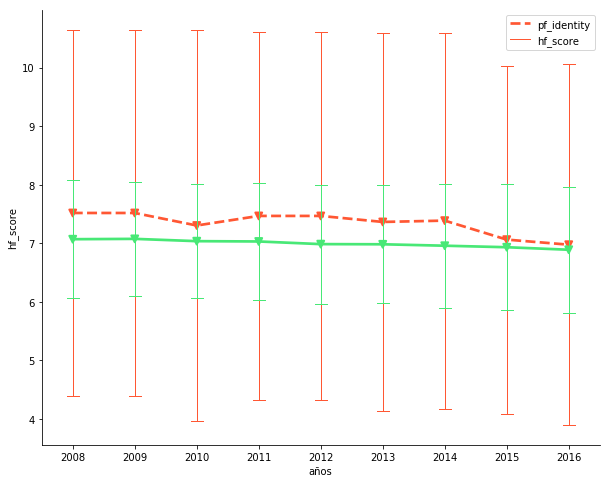

In [215]:
plt.figure(figsize=(10,8))
seaborn.pointplot(data=dataset,
                  x='year', y='pf_identity', dodge=True, ci='sd',
                  markers='v', linestyles='--', errwidth=1, capsize=0.2, color="#ff5733")
seaborn.pointplot(data=dataset,
                  x='year', y='hf_score', dodge=True, ci='sd',
                  markers='v', linestyles='-', errwidth=1, capsize=0.2, color="#48e876")
plt.xlabel('años')
plt.legend(('pf_identity', 'hf_score'),prop = {'size':10}, loc = 'upper right')
seaborn.despine()


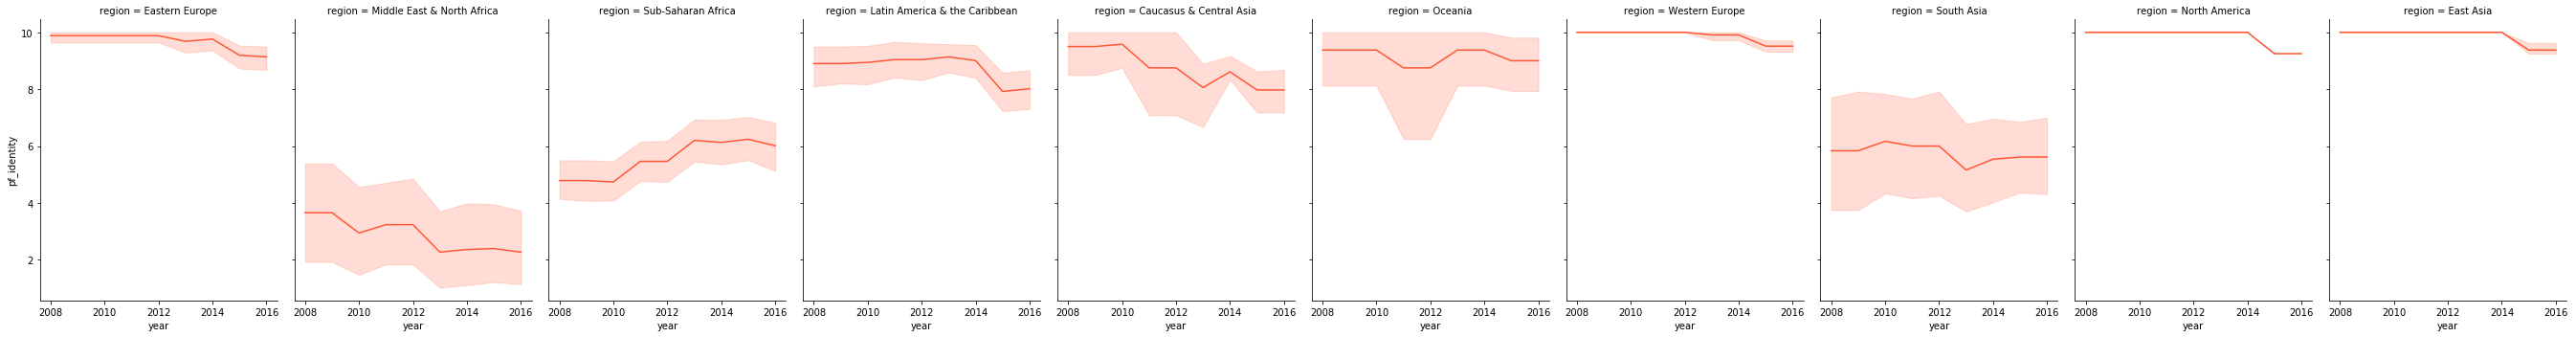

In [233]:
seaborn.relplot(x='year', y='pf_identity', col="region", data=dataset[important_cols], 
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", color="#ff5733")

seaborn.despine()

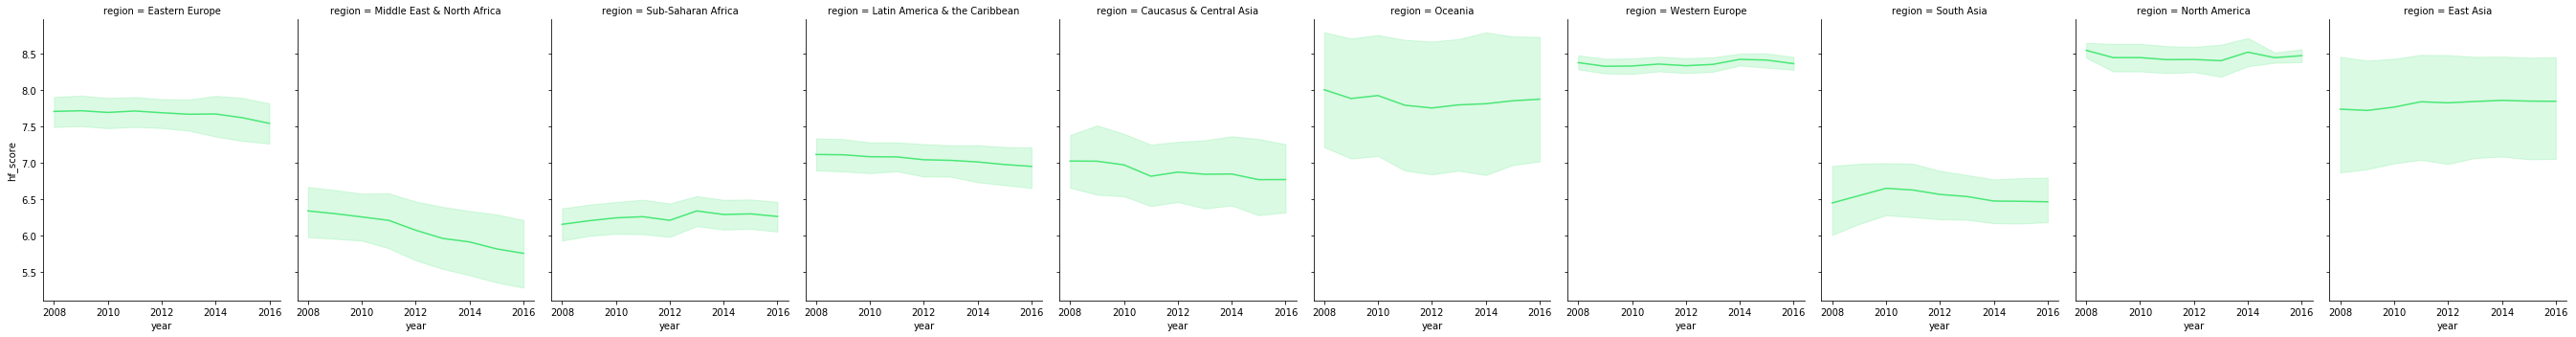

In [231]:
seaborn.relplot(x='year', y='hf_score', col="region", data=dataset[important_cols], 
            height=5, aspect=.75, facet_kws=dict(sharex=False),
            kind="line", legend="full", color="#48e876")

seaborn.despine()

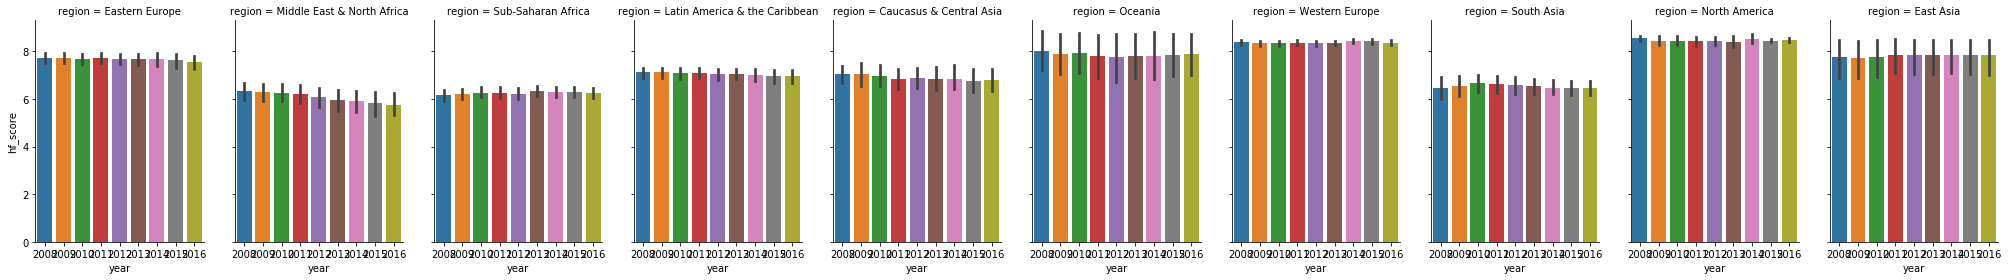

In [230]:
seaborn.catplot(
    'year', 'hf_score', data=dataset[important_cols], col="region",
     kind="bar", height=4, aspect=.7)
seaborn.despine()

## Gráfico de pf_identity en el tiempo por región

## Análisis de Regiones con Alta Desviación Estandar

- Middle East & North Africa

In [17]:
alta_std_me_af = gt_data
alta_std_me_af = alta_std_me_af[alta_std_me_af['region'] == 'Middle East & North Africa']
alta_std_me_af['pf_identity'].describe()

count    150.000000
mean       2.830000
std        3.165090
min        0.000000
25%        0.000000
50%        2.500000
75%        4.791667
max       10.000000
Name: pf_identity, dtype: float64

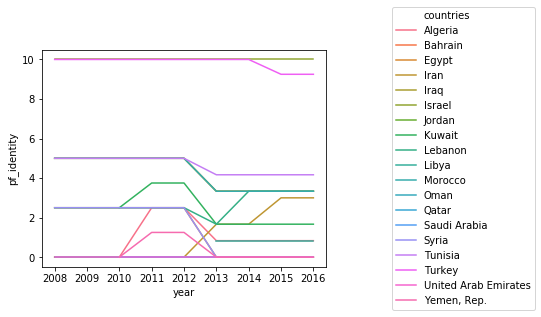

In [18]:
# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
alta_std_me_af_gra = seaborn.lineplot(data=alta_std_me_af,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = alta_std_me_af_gra.get_position()
alta_std_me_af_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
alta_std_me_af_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()

Si bien no se distinguen algunos de los colores del gráfico para identificar puntualmente algunos países con colores similares, el objetivo de realizar este gráfico es identificar algun salto puntual en un momento del tiempo. Lo que se puede ve es que no hay cambios bruscos en un momento del tiempo particular.

In [19]:
test_africa = alta_std_me_af.groupby(['countries']).std()
test_africa = test_africa[['pf_identity', 'hf_score']]
test_africa

,pf_identity,hf_score
countries,,
Algeria,0.972222,0.044538
Bahrain,0.878410,0.188140
Egypt,1.317616,0.482424
Iran,1.317030,0.361563
Iraq,NaN,NaN
Israel,0.000000,0.147626
Jordan,0.878410,0.131945
Kuwait,0.853348,0.225117
Lebanon,0.629941,0.151943


- Sub-saharan Africa

In [20]:
alta_std_ss_af = gt_data
alta_std_ss_af = alta_std_ss_af[alta_std_ss_af['region'] == 'Sub-Saharan Africa']
alta_std_ss_af['pf_identity'].describe()

count    348.000000
mean       5.567050
std        2.445204
min        0.000000
25%        4.062500
50%        5.000000
75%        7.500000
max       10.000000
Name: pf_identity, dtype: float64

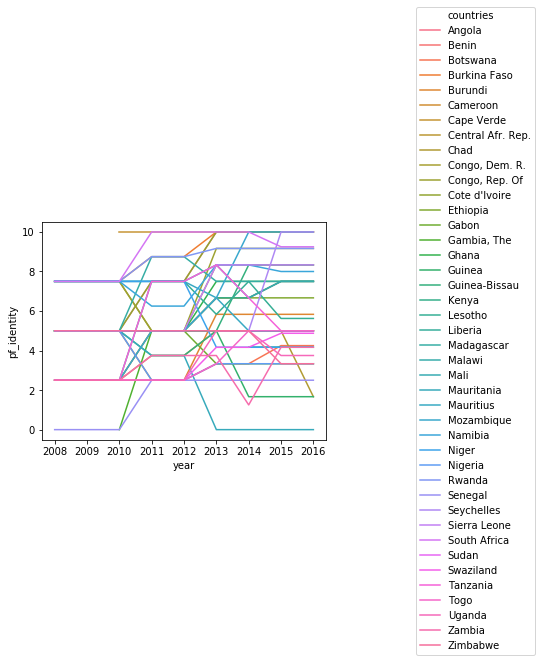

In [21]:
# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
alta_std_ss_af_gra = seaborn.lineplot(data=alta_std_ss_af,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = alta_std_ss_af_gra.get_position()
alta_std_ss_af_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
alta_std_ss_af_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()

In [22]:
test_africa = alta_std_ss_af.groupby(['countries']).std()
test_africa = test_africa[['pf_identity', 'hf_score']]
test_africa = test_africa[test_africa['pf_identity']>2]
filtro_countries = test_africa.reset_index('countries')['countries'].values
filtro_countries

array(['Angola', 'Benin', "Cote d'Ivoire", 'Lesotho', 'Mauritania',
       'Mozambique', 'Seychelles', 'Tanzania'], dtype=object)

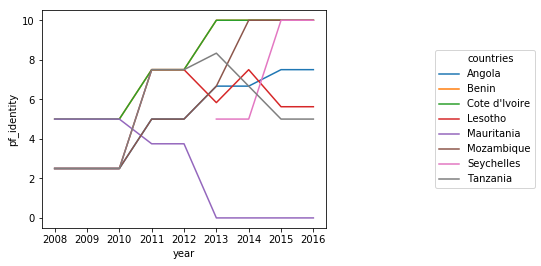

In [23]:
countries_alta_std = alta_std_ss_af[alta_std_ss_af.countries.isin(filtro_countries)]
countries_alta_std = countries_alta_std[['year','countries','pf_identity']]

# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
countries_alta_std_gra = seaborn.lineplot(data=countries_alta_std,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = countries_alta_std_gra.get_position()
countries_alta_std_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
countries_alta_std_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()


## 2. Agregación de datos

1. Grafiquen la media de la variable *pf_identity* y *hf_score* a través de los años.
2. Realicen los mismos gráficos, pero separando por regiones (Cada variable en un gráfico distinto, sino no se ve nada). ¿La tendencia observada, es la misma que si no dividimos por regiones?
3. Si lo consideran necesario, grafiquen algunos países de Latinoamerica para tratar de explicar la tendencia de la variable *pf_identity* en la región. ¿Cómo seleccionarion los países relevantes a esa tendencia?

Hint: hay un gráfico de seaborn que hace todo por vos!

Sólo por curiosidad, graficar la tendencia de *hf_score* y *ef_score* a través de los años. ¿Tienen alguna hipótesis para este comportamiento?

### Gráfico pf_identity y hf_score a través de los años

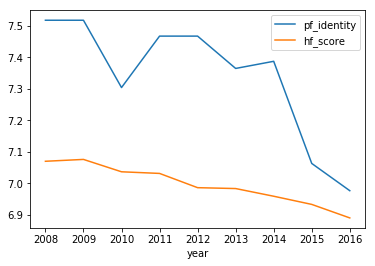

In [24]:
mean_pf_hf = gt_data[['year','pf_identity','hf_score']]
mean_pf_hf = mean_pf_hf.dropna()
mean_pf_hf = mean_pf_hf.groupby('year').mean().reset_index('year')
mean_pf_hf.plot(x='year',y=['pf_identity','hf_score'])


### Media pf_identity en el tiempo por región

1. Tabla con la media de ambas variables a lo largo de los años

In [25]:
mean_time = gt_data.set_index(['year'])
mean_time = mean_time[['region','pf_identity','hf_score']].groupby(['year','region']).mean()
mean_time = mean_time.reset_index(['region','year'])
mean_time.head()

,year,region,pf_identity,hf_score
0,2008,Caucasus & Central Asia,9.500000,7.027743
1,2008,East Asia,10.000000,7.741378
2,2008,Eastern Europe,9.880952,7.710244
3,2008,Latin America & the Caribbean,8.900000,7.118196
4,2008,Middle East & North Africa,3.653846,6.342013


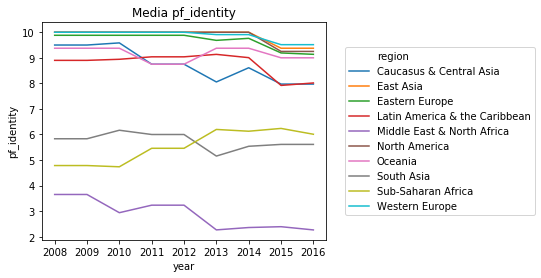

In [26]:

mean_time_pf_gra = seaborn.lineplot(data=mean_time,x='year',y='pf_identity',hue='region', color='#0059b3')

# Removed 'ax' from T.W.'s answer here aswell:
box = mean_time_pf_gra.get_position()
mean_time_pf_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
mean_time_pf_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)
plt.title('Media pf_identity')
plt.show()

### Media de hf_score en el tiempo por región

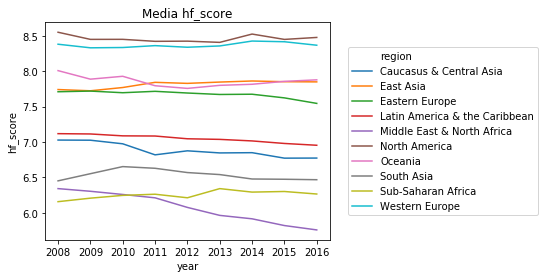

In [27]:
mean_time_pf_gra = seaborn.lineplot(data=mean_time,x='year',y='hf_score',hue='region', color='#0059b3')

# Removed 'ax' from T.W.'s answer here aswell:
box = mean_time_pf_gra.get_position()
mean_time_pf_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
mean_time_pf_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)
plt.title('Media hf_score')
plt.show()

### Análisis región latina

In [28]:
alta_std_latin = gt_data
alta_std_latin = alta_std_latin[alta_std_latin['region'] == 'Latin America & the Caribbean']
alta_std_latin['pf_identity'].describe()

count    232.000000
mean       8.765086
std        1.711732
min        5.000000
25%        7.500000
50%       10.000000
75%       10.000000
max       10.000000
Name: pf_identity, dtype: float64

In [29]:
test_latin = alta_std_latin.groupby(['countries']).std()
test_latin = test_latin[['pf_identity']]
test_latin

,pf_identity
countries,
Argentina,0.000000
Bahamas,0.000000
Barbados,0.000000
Belize,0.833333
Bolivia,0.000000
Brazil,1.102396
Chile,2.273709
Colombia,0.000000
Costa Rica,1.320814


Nos quedamos con los países con STD > 2 

In [58]:
test_latin = alta_std_latin.groupby(['countries']).std()
test_latin = test_latin[['pf_identity']]
test_latin = test_latin[test_latin['pf_identity']>2]
filtro_latin = test_latin.reset_index('countries')['countries'].values
filtro_latin

array(['Chile', 'Guyana'], dtype=object)

In [8]:
latin_alta_std = alta_std_latin[alta_std_latin.countries.isin(filtro_latin)]
latin_alta_std = latin_alta_std[['year','countries','pf_identity']]

# EDIT: I Needed to ad the fig
fig, ax1 = plt.subplots(1,1)

# EDIT: 
# T.W.' answer said: "create with hue but without legend" <- # I needed to include it!
# So, removed: legend=False
latin_alta_std_gra = seaborn.lineplot(data=latin_alta_std,x='year', y='pf_identity',color='#0059b3',hue="countries",ci=None)

# EDIT: 
# Removed 'ax' from T.W.'s answer here aswell:
box = latin_alta_std_gra.get_position()
latin_alta_std_gra.set_position([box.x0, box.y0, box.width * 0.85, box.height]) # resize position

# Put a legend to the right side
latin_alta_std_gra.legend(loc='center right', bbox_to_anchor=(1.75, 0.5), ncol=1)

plt.show()


NameError: name 'alta_std_latin' is not defined

## 2. Distribuciones
  1. Graficar en un mismo histograma la distribución de la variable *pf_identity* en global, y en Latinoamérica y el caribe. Repetir para la variable *hf_score*. ¿Visualmente, a qué tipo de distribución corresponde cada variable? ¿Es correcto utilizar todos los registros para esas zonas en estos gráficos?
  2. Realizar una prueba de Kolmogorov-Smirnof para comprobar analíticamente si estas variables responden la distribución propuesta en el ejercicio anterior. Hint: podés usar https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html, pero hay que tener en cuenta que si la distribución es "norm", entonces va a comparar los datos con una distribución normal con media 0 y desviación estándar 1. Se puede utilizar la distribución sobre todos los datos o sólo sobre Latinoamérica.
  3. Realizar un gráfico QQ de las mismas distribuciones. Se puede utilizar a,bas distribuciones sobre todos los datos o sólo sobre Latinoamérica, pero no cruzadas.
  4. Medir la asimetría (skew) y curtosis de las mismas distribuciones con las que realizó el gráfico anterior. ¿Cómo se relacionan estos estadísticos con la forma del gráfico QQ obtenido previamente? ¿El gráfico QQ provee más información que no esté presente en estos estadísticos?

### 2.1 Pf_identity Global

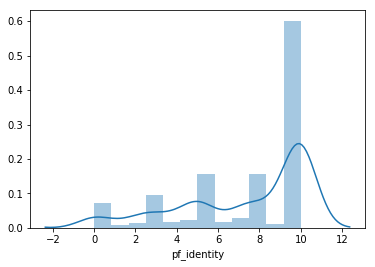

In [9]:
seaborn.distplot(dataset['pf_identity'].dropna())

Podemos ver que el gráfico tiene una distribución anormal en el valor 10 ya que concentra muchos valores.  En caso intentaramos remover outliers lejanos a 2.5 std de la media podemos ver que no removemos ninguno. Proseguimos a analizar el comportamiento de hf_score

In [10]:
pf_ident_glo = dataset['pf_identity']
# Eliminar filas a más de 2.5 desviaciones estándares de la media
mask_pf_id_glo = numpy.abs(pf_ident_glo-pf_ident_glo.mean()) <= (2.5*pf_ident_glo.std())
pf_ident_glo_hist = pf_ident_glo[mask_pf_id_glo]
print("Filas removidas", pf_ident_glo.count() - pf_ident_glo_hist.count())
print("pf_identity Max", pf_ident_glo_hist.max())

Filas removidas 0
pf_identity Max 10.0


Graficamos un boxplot de pf_identity por región que nos permite ver claramente como muchas regiones concentran sus valores en 10 con valores outliers por debajo. Esto ayuda a entender visualmente de manera integral la tendencia del histograma anterior hacia el valor 10.

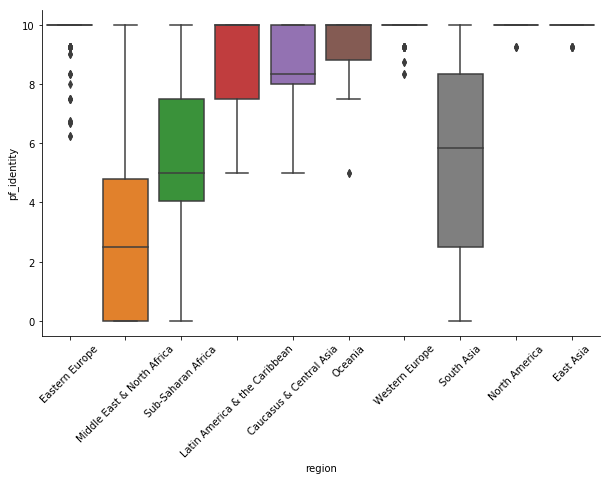

In [11]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='region', y='pf_identity')
plt.ylabel('pf_identity')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

### Hf_score Global

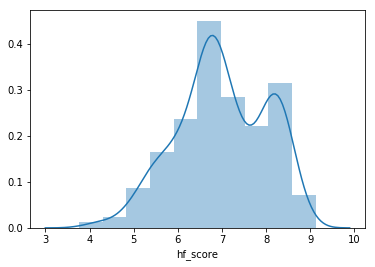

In [12]:
seaborn.distplot(dataset['hf_score'].dropna(), bins=10)

Este comportamiento parece normal a simple vista con picos entre el 8 y el 9.

Realizamos un boxplot de esta variable por región para visualizar con mas claridad la distribución.

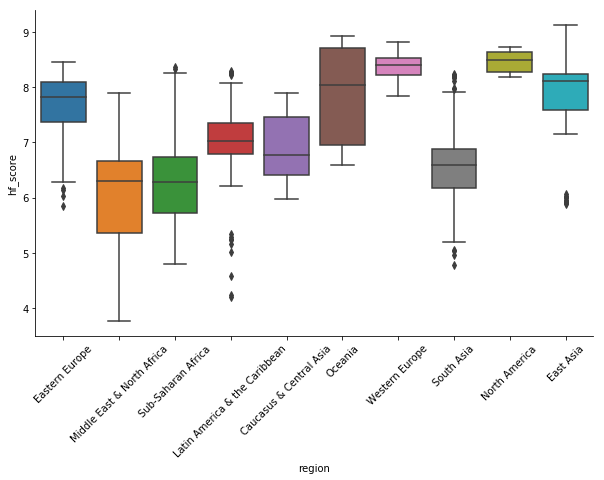

In [13]:
plt.figure(figsize=(10,6))
seaborn.boxplot(data=dataset,
                x='region', y='hf_score')
plt.ylabel('hf_score')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()

En este caso, podemos que la distribución de Western Europe y North America esta distribuida de manera normal entre 8 y 9. De esta forma podemos ver que el pico de valores 

### Pf_identity Latinoamerica

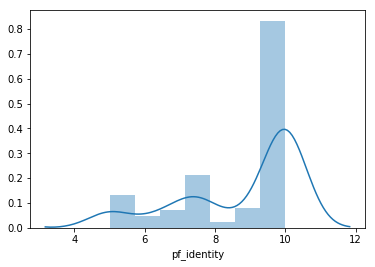

In [14]:
pf_id_latin = dataset
pf_id_latin = pf_id_latin[pf_id_latin['region'] == 'Latin America & the Caribbean']
seaborn.distplot(pf_id_latin['pf_identity'].dropna())

### Histogramas PF Conjuntos

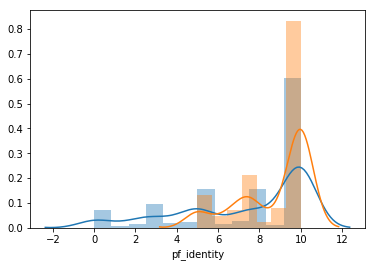

In [15]:
seaborn.distplot(dataset['pf_identity'].dropna())
seaborn.distplot(pf_id_latin['pf_identity'].dropna())

### Hf_score Latinoamerica

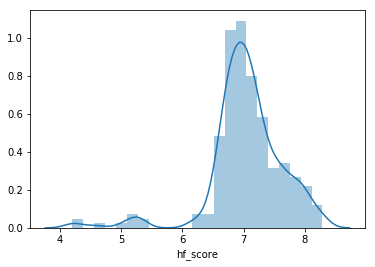

In [16]:
hf_sc_latin = dataset
hf_sc_latin = hf_sc_latin[hf_sc_latin['region'] == 'Latin America & the Caribbean']
seaborn.distplot(hf_sc_latin['hf_score'].dropna())

### Histogramas HF conjuntos

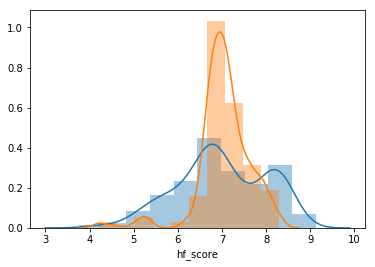

In [17]:
seaborn.distplot(dataset['hf_score'].dropna(), bins=10)
seaborn.distplot(hf_sc_latin['hf_score'].dropna(),bins=10)


Intentamos mover los outliers con el mismo método anterior, eliminando los valores que estan a mas de 2,5 de desviacion de la media, con esto podemos ver que se remueven 9 filas en la distribucion de latinoamerica y 0 en la distribucion global, por lo que volvemos a graficar.

In [28]:
# Eliminar filas a más de 2.5 desviaciones estándares de la media de Latinoamerica
hf_sc_lat = datasetlatin['hf_score']
mask_hf_sc_lat = numpy.abs(hf_sc_lat-hf_sc_lat.mean()) <= (2.5*hf_sc_lat.std())
hf_sc_lat_hist = hf_sc_lat[mask_hf_sc_lat]
print("Filas removidas", hf_sc_lat.count() - hf_sc_lat_hist.count())
print("pf_identity Max", hf_sc_lat_hist.max())

Filas removidas 9
pf_identity Max 8.290152327000001


In [26]:
# Eliminar filas a más de 2.5 desviaciones estándares de la media Global
hf_sc_glob = dataset['hf_score']
mask_hf_sc_glob = numpy.abs(hf_sc_glob-hf_sc_glob.mean()) <= (2.5*hf_sc_glob.std())
hf_sc_glob_hist = hf_sc_glob[mask_hf_sc_glob]
print("Filas removidas", hf_sc_glob.count() - hf_sc_glob.count())
print("pf_identity Max", hf_sc_glob.max())

Filas removidas 0
pf_identity Max 9.126312939


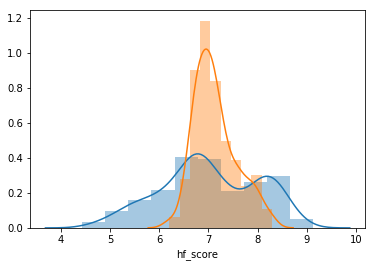

In [31]:
seaborn.distplot(hf_sc_glob_hist.dropna(), bins=10)
seaborn.distplot(hf_sc_lat_hist.dropna(),bins=10)


En este caso el gráfico se lo ve mas centrado en 7 pero con dos picos entre 8 y 9 (comportamiento similar al de pf_identity)
Y en este caso podemos ver que la media trata de tender a 7 y se concentran en ese punto.
Al presentarse dos picos, puede que debamos separar la muestra por tener diferentes caracteristicas nunestra poblacion, esto puede indicarnos que tenemos dos grandes grupos de comportamientos que deben ser analizados de forma separada.

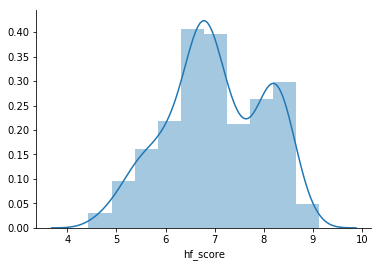

In [40]:
seaborn.distplot(hf_sc_lat_hist, bins=10)
seaborn.despine()

En este caso el gráfico se lo ve mas centrado en 7 pero con dos picos entre 8 y 9 (comportamiento similar al de pf_identity)

### 2.2 KTest pf_identity global

In [101]:
pf_ident_glo = dataset['pf_identity'].dropna()

In [102]:
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(pf_ident_glo)
loc, scale

(7.334179970968069, 3.1583260555019637)

In [103]:
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)

In [104]:
stats.kstest(sample,'norm')

KstestResult(statistic=0.94308914022766, pvalue=0.0)

In [105]:
stats.kstest(pf_ident_glo,'norm')

KstestResult(statistic=0.9146901895363428, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest hf_score global

In [107]:
hf_score_glo = dataset['hf_score'].dropna()
stats.kstest(hf_score_glo,'norm')

KstestResult(statistic=0.9999170006054449, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest pf_identity latinoamerica

In [108]:
pf_identity_latin = dataset
pf_identity_latin = pf_identity_latin[pf_identity_latin['region'] == 'Latin America & the Caribbean']
stats.kstest(pf_identity_latin['pf_identity'].dropna(),'norm')

KstestResult(statistic=0.9999997133484281, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest hf_score latinoamerica

In [35]:
hf_score_latin = dataset
hf_score_latin = hf_score_latin[hf_score_latin['region'] == 'Latin America & the Caribbean']
stats.kstest(hf_score_latin['hf_score'].dropna(),'norm')

KstestResult(statistic=0.9999866968877408, pvalue=0.0)

Al ser p-value = 0 no podemos decir que la distribución de esta variable es normal

### KTest para hf_score de  North America
Este test lo hacemos para validar lo expuesto en el boxplot donde podiamos suponer que North America tenia distribución normal

In [38]:
hf_score_nam = dataset
hf_score_nam = hf_score_nam[hf_score_nam['region'] == 'North America']
stats.kstest(hf_score_nam['hf_score'].dropna(),'norm')

KstestResult(statistic=0.9999999999999999, pvalue=1.3134517764154804e-287)

Graficamente podemos ver que tiene forma de campana como supusimos pero no es normal

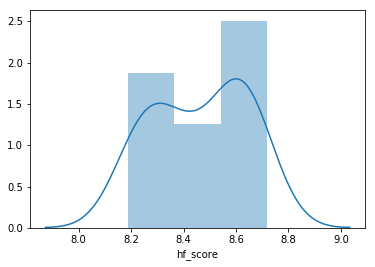

In [40]:
seaborn.distplot(hf_score_nam['hf_score'].dropna())

### 2.3 QQ Plot entre pf_identity global y distribución normal 

- Primero graficamos el histograma de la distribución normal creada y pf_identity global, ya que estas son las dos distribuciones que estamos comparando, veremos graficamente si existe relacion para luego visualizarlo en el grafico QQ

In [45]:
# eliminamos los valores NaN de la muestra para crear la dist normal
pf_ident_glo = dataset['pf_identity'].dropna()
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc, scale = stats.norm.fit(pf_ident_glo)
# creamos la dist normal con nuestros parametros de media y std
norm_dist = stats.norm(loc, scale)
# Generamos una muestra
sample = norm_dist.rvs(1000)
loc, scale

(7.334179970968069, 3.1583260555019637)

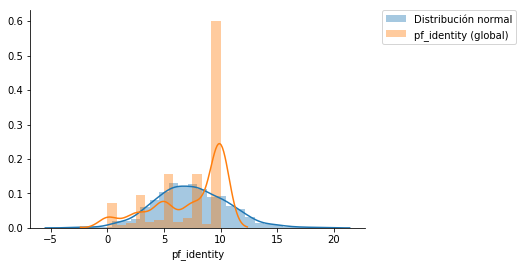

In [46]:
# La graficamos
seaborn.distplot(sample, label='Distribución normal')
seaborn.distplot(pf_ident_glo, label='pf_identity (global)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Luego armamos la muestra del mismo tamaño para armar el QQ Plot

In [59]:
percs = numpy.linspace(0,100,21)  
# Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample = numpy.percentile(pf_ident_glo, percs)
qn_norm_dist = numpy.percentile(norm_dist.rvs(len(pf_ident_glo)), percs)

#### QQ Plot

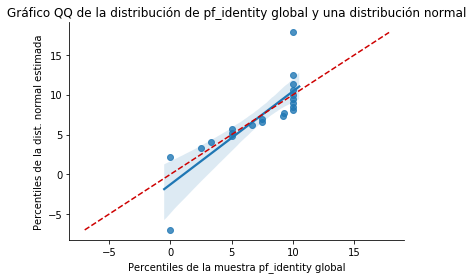

In [49]:
#plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample, y=qn_norm_dist)
plt.xlabel('Percentiles de la muestra pf_identity global')
plt.ylabel('Percentiles de la dist. normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity global y una distribución normal')

x = numpy.linspace(numpy.min((qn_sample.min(), qn_norm_dist.min())), numpy.max((qn_sample.max(),qn_norm_dist.max())))
plt.plot(x,x, color='#ce0000', ls="--")

seaborn.despine()

Si bien parecen tener un comportamiento parecido, podemos ver como los valores de pf_identity se concentran en el valor 10. Ese es el mismo pico que se vió anteriormente en el histograma.
Este grafico nos ayuda a ver que los valores de la distribucion de pf_identity se concentran en en ultimo quartil, como ya vimos en el hihstograma, nuestra muestra tiende a ser asimetrica a la derecha, ya que concentra todos los valores en el valor mas grande de nuestro rango de daatos, en el 10.

In [60]:
# Test de Asimetria de los Percentiles de la dist. normal estimada
stats.skew(qn_norm_dist)

0.07957160596315978

In [50]:
# Test de Asimetria de los Percentiles de la muestra pf_identity global
stats.skew(qn_sample)

-0.9158386722697632

Si hacemos el test de asimetria de las dos distribuciones graficadas en QQ, EL CAF en la distribucion normal nos da cercano a 0, es decir que la normal es simetrica centrada en la media de nuestra poblacion, ya que para crear esta distribucion a la normal estandar la parametrizamos con los valores de la media y desviacion de pf_identity, para que concentre los valores en la media y poder hacer comparables las dos muestras.
Por otro lado vemos que en la muestra global de pf_identity el CAF < O lo que nos dice que la distribucion de PF_identity es asimetrica sesgada hacia la derecha. Lo que nos indica que tiene todos los valores concentrados por arriba de la media, en el ultimo quartil. Lo podemos ver en la descripcion de la variable por quartil y en la mediana que el valor medio de los datos ordenados es 9, lo que indica que el 50% de los valores estara por encima del 9, obteniendo que la moda es 10

In [56]:
dataset['pf_identity'].median()

9.166666667000001

In [57]:
dataset['pf_identity'].mode()

0    10.0
dtype: float64

In [55]:
dataset['pf_identity'].describe()

count    1378.000000
mean        7.334180
std         3.159473
min         0.000000
25%         5.000000
50%         9.166667
75%        10.000000
max        10.000000
Name: pf_identity, dtype: float64

**2.3 Conclusiones del grafico QQ y los test de asimetria**
En el caso del QQ plot, la cantidad de puntos acumulados en el valor 10 de la distribución de pf_identity nos permita validar lo obtenido en primer lugar: CAF < 0. Al igual que en el histograma veiamos que los puntos estaban concentrados en el ultimo quartil, lo que nos decia que la muestra era asimetrica. Lo podemos corroborar con un grafico de cajas, que nos muestra la mayor concentracion de datos en el ultimo cuartil con la media esta cercana al 9.

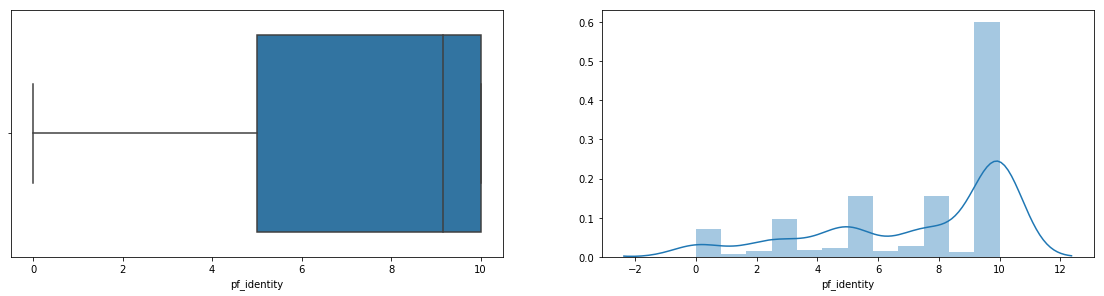

In [166]:
plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.boxplot(data=dataset,   x='pf_identity')
plt.subplot2grid((2,3),(0,1))
seaborn.distplot(dataset['pf_identity'].dropna())

### 2.3 QQ Plot entre pf_identity Latinoamerica y distribución normal 

- Primero graficamos el histograma de la distribución normal creada y pf_identity de Latinoamerica, ya que estas son las dos distribuciones que estamos comparando, veremos graficamente si existe relacion para luego visualizarlo en el grafico QQ

In [133]:
datasetlatin=dataset[(dataset.region=='Latin America & the Caribbean')]
# eliminamos los valores NaN de la muestra para crear la dist normal
pf_ident_lat = datasetlatin['pf_identity'].dropna()
# Estimamos los parámetros muestrales. Si bien son sólo la media y desviación estándar, podemos
# usar scipy para estimar (fit) cualquier distribución.
loc_lat, scale_lat = stats.norm.fit(pf_ident_lat)
# creamos la dist normal con nuestros parametros de media y std
norm_dist_lat = stats.norm(loc_lat, scale_lat)
# Generamos una muestra
sample_lat = norm_dist.rvs(1000)
loc_lat, scale_lat

(8.765086206909483, 1.7080389127332938)

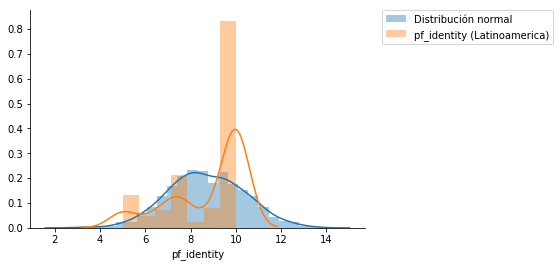

In [134]:
# La graficamos
seaborn.distplot(sample_lat, label='Distribución normal')
seaborn.distplot(pf_ident_lat, label='pf_identity (Latinoamerica)')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
seaborn.despine()

Luego armamos la muestra del mismo tamaño para armar el QQ Plot

In [135]:
percs = numpy.linspace(0,100,21)  
# Creamos 20 puntos percentiles igualmente distribuidos entre 0 y 100.
qn_sample_lat = numpy.percentile(pf_ident_lat, percs)
qn_norm_dist_lat = numpy.percentile(norm_dist.rvs(len(pf_ident_lat)), percs)

#### QQ Plot

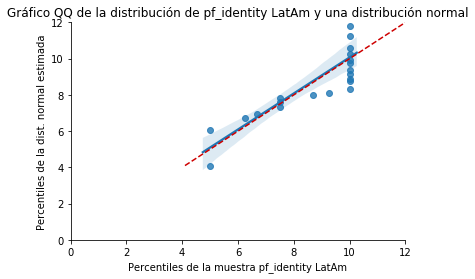

In [136]:
#plt.figure(figsize=(12,6))
seaborn.regplot(x=qn_sample_lat, y=qn_norm_dist_lat)
plt.xlabel('Percentiles de la muestra pf_identity LatAm')
plt.ylabel('Percentiles de la dist. normal estimada')
plt.title('Gráfico QQ de la distribución de pf_identity LatAm y una distribución normal')
plt.xlim(0,12)
plt.ylim(0,12)
x = numpy.linspace(numpy.min((qn_sample_lat.min(), qn_norm_dist_lat.min())), numpy.max((qn_sample_lat.max(),qn_norm_dist_lat.max())))
plt.plot(x,x, color='#ce0000', ls="--")

seaborn.despine()

Este grafico se ve muy similar al de la muestra global, pero la normal esta desplazada en el eje ya que comienza en el 4, quiere decir que los valores mas significativos estan tambien desplazados hacia el ultimo cuartil pero mas condensados. 

In [140]:
# Test de Asimetria de los Percentiles de la dist. normal estimada
stats.skew(qn_norm_dist_lat)

0.24923681460914082

In [139]:
# Test de Asimetria de los Percentiles de la muestra pf_identity global
stats.skew(qn_sample_lat)

-1.0124800800156446

Si hacemos el test de asimetria de las dos distribuciones graficadas en QQ, EL CAF en la distribucion normal nos da cercano a 0, es decir que la normal es simetrica centrada en la media de nuestra poblacion, ya que para crear esta distribucion a la normal estandar la parametrizamos con los valores de la media y desviacion de pf_identity, para que concentre los valores en la media y poder hacer comparables las dos muestras.
Por otro lado vemos que en la muestra de latinoamerica tiene el  CAF < O lo que nos dice que la distribucion es asimetrica sesgada hacia la derecha, similar a la distribucion global. 
En este caso podemos comprobar que la mediana es 10 y en el ambito global era 9, por ello vemos la jsutificacion del desplazamiento de valores

In [141]:
datasetlatin['pf_identity'].median()

10.0

**2.3 Conclusiones del grafico QQ y los test de asimetria**
En el caso del QQ plot, la cantidad de puntos acumulados en el valor 10 de la distribución de pf_identity nos permita validar lo obtenido en primer lugar: CAF < 0. Al igual que en el histograma veiamos que los puntos estaban concentrados en el ultimo quartil, lo que nos decia que la muestra era asimetrica. Lo podemos corroborar con un grafico de cajas, que nos muestra la mayor concentracion de datos en el ultimo cuartil y comparando con la distribucion global vemos que la desviacion de los datos es menor.

Text(0.5, 1.0, 'Global')

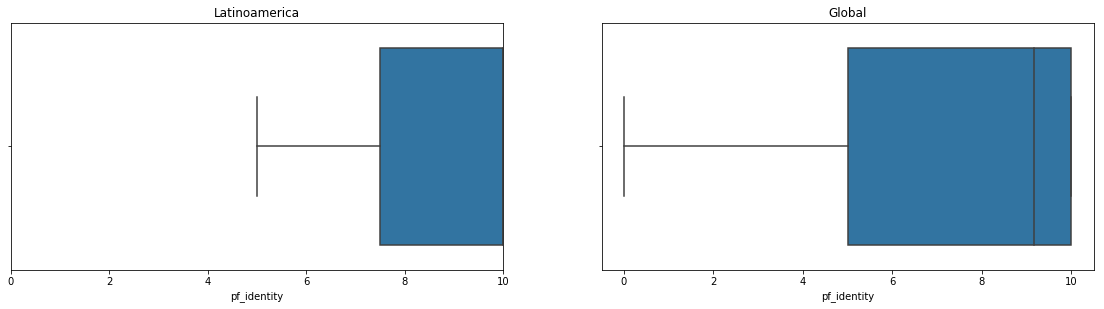

In [180]:
plt.figure(figsize=(30,10))
plt.subplot2grid((2,3),(0,0))
seaborn.boxplot(data=datasetlatin,   x='pf_identity')
plt.xlim(0, 10)
plt.title('Latinoamerica')
plt.subplot2grid((2,3),(0,1))
seaborn.boxplot(data=dataset,   x='pf_identity')
plt.title('Global')

## 3. Correlaciones

En este ejercicio queremos responder a las preguntas

* Las libertades sociales y económicas, ¿van siempre de la mano?
* ¿Cómo se relacionan ambas con las libertades individuales y respectivas a las relaciones personales?

Para ello, analizaremos las correlaciones entre las variables pf_identity, hf_score y ef_score. 

Como pf_indentity contribuye al cálculo de hf_score y ef_score, esperamos hallar algún grado de correlación. Sin embargo, queremos medir qué tanta correlación. 

1. ¿Qué conclusiones puede sacar de un gráfico pairplot de estas tres variables? ¿Es adecuado para los valores de pf_identity? ¿Por qué?
2. Graficar la correlación entre pf_identity y hf_score; y entre pf_identity y ef_score. Analizar el resultado, ¿se pueden sacar conclusiones? Tengan en cuenta que como pf_identity es el resultado de un promedio, sólo toma algunos valores. Es, en efecto, discreta.
3. Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 
4. [Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable *region* es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)


### 3.1 Grafico pairplot

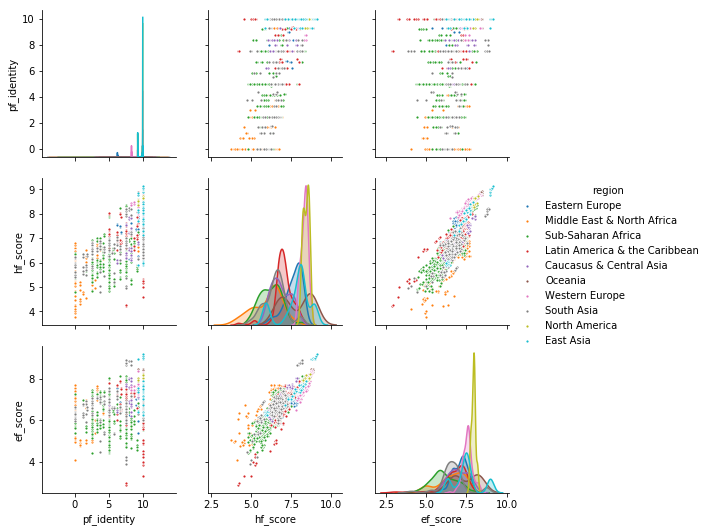

In [182]:
seaborn.pairplot(
    data=dataset,
    vars=['pf_identity', 'hf_score', 'ef_score'], hue='region',
    markers='.')

3.1 En este grafico podemos ver como existen una correlación lineal mas clara entre hf_score y ef_score, ya que los puntos podrían asociarse de manera mas clara con una recta, de tendencia creciente, por lo que serian directamente proporcionales.
Distinto es el caso si comparamos estas dos variables con pf_identity ya que la variación de pf_identity no incide mucho en el comportamiento de hf_score y ef_score. Podemos ver que pf_identity es discreta pero los puntos se concentran en valores discretos como son los valores que indican los cuartiles como 0, 3, 5, 7 y 10

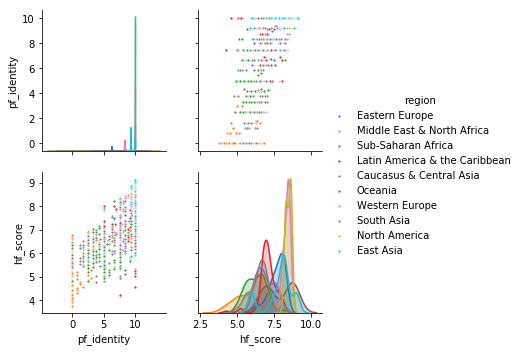

In [183]:
seaborn.pairplot(
    data=dataset,
    vars=['pf_identity', 'hf_score'], hue='region',
    markers='.')

En este grafico podemos detectar un comportamiento que se acerca al lineal ya que la tendencia es creciente, pero los datos estan muy distribuidos, a medida que auemntan los valores en la pf, los valores de hf tambien se concentranen valores altos.
Esto no implica una coorelacion tan fuerte pero si vemos que los datos se distribuyen con esa tendencia ya que el calculo de hf esta influido por pf. La libertad humana esta influenciada por la libertab personal y tambien la libertad economica, pero esta depende mas de la situacion del pais.

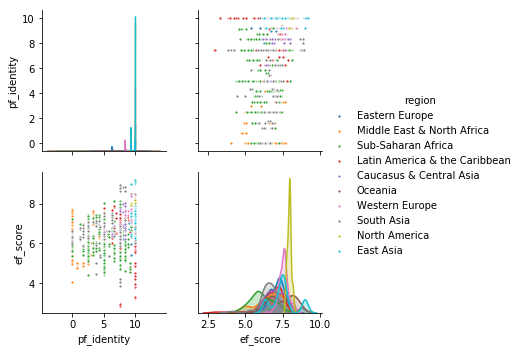

In [184]:
seaborn.pairplot(
    data=dataset,
    vars=['pf_identity',  'ef_score'], hue='region',
    markers='.')

**Conclusiones:**
Podemos ver como existen una correlación lineal mas clara entre hf_score y ef_score, ya que los puntos podrían asociarse de manera mas clara con una recta. No así en la comparación de pf_identity con estas. Esto nos indica que la variación de pf_identity no incide mucho en el comportamiento de hf_score y ef_score. 
La relacion entre pf_identity y ef_score puede mostrarnos que la libertad economica se va a mantener entre los rangos de 4 a 8 mientras la libertad individual cambia, esto se debe a las distintas culturas que estamos considerando y las distintas situaciones economicas de las regiones.
En la siguiente tabla vemos unos ejemplos, donde a muy alto valor de pf_identity, hf_score y ef_score no varían demasiado comparado con un caso donde el valor de pf_identity es muy bajo.

In [191]:
dataset[['countries','pf_identity','hf_score','ef_score']].head(4)

,countries,pf_identity,hf_score,ef_score
0,Albania,6.250000,7.568140,7.54
1,Algeria,0.833333,5.135886,4.99
2,Angola,7.500000,5.640662,5.17
3,Argentina,10.000000,6.469848,4.84


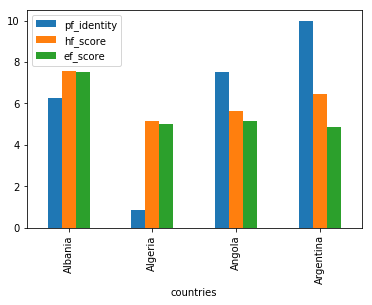

In [192]:
dataset[['countries','pf_identity','hf_score','ef_score']].head(4).set_index('countries').plot.bar()

En este caso vemos que el HF_score es el valor intermedio entre el pf y el ef, con lo cual fundamentamos con los datos que HF es el producto del calculo de las otras dos variables. Ahora corroboramos con los coeficientes de relacion esta hipotesis.

3.3 Calcular algún coeficiente de correlación adecuado entre los dos pares de variables, dependiendo de la cantidad de datos, el tipo de datos y la distribución de los mismo. Algunas opciones son: coeficiente de pearson, coeficiente de spearman, coeficientes de tau y de kendall. Interpretar los resultados y justificar si las variables están correlacionadas o no. 


In [244]:
dataset[important_cols2].corr(method ='pearson')


,year,pf_identity,ef_score,hf_score
year,1.000000,-0.086542,0.018711,-0.036066
pf_identity,-0.086542,1.000000,0.308120,0.521310
ef_score,0.018711,0.308120,1.000000,0.681062
hf_score,-0.036066,0.521310,0.681062,1.000000


En este caso podemos decir que:
- Relacion entre: pf_identity y hf_score= 0,52 --> 0 < r < 1 Existe una correlacion positiva lineal, es decir que cuando una aumenta la otra tambien lo hace pero en una proporcion mas baja. 
- Relacion entre: pf_identity y ef_score= 0,30 --> 0 < r < 1
Existe una correlacion positiva tambien pero en menor proporcion que la relacion con hf.

[Opcional] Analizar la correlación entre la region y el hf_score (y/o el ef_score); y entre la region y el pf_identity. Considerar que como la variable region es ordinal, debe utilizarse algún tipo de test. Explicar cuáles son los requisitos necesarios para la aplicación de ese test. (Si no se cumplieran, se pueden agregar algunos datos para generar más registros)

Text(0.5, 1.0, 'PF')

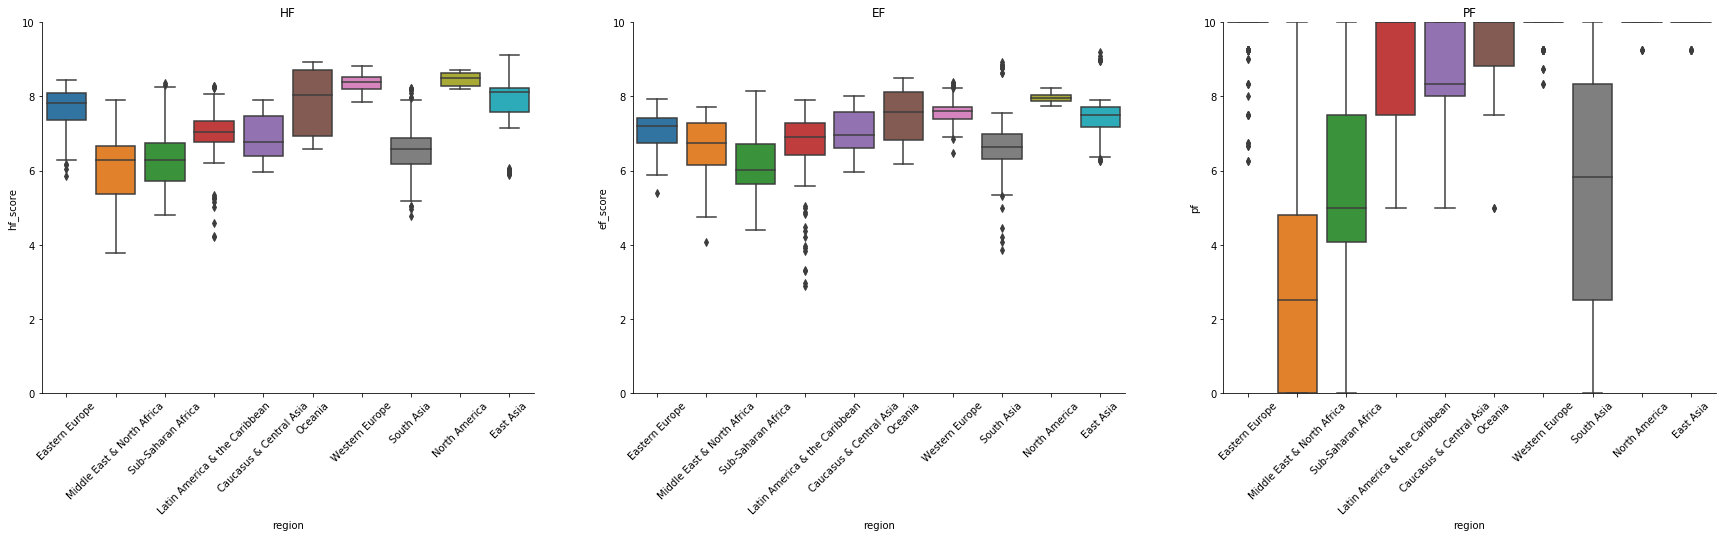

In [200]:
plt.figure(figsize=(30,15))
plt.subplot2grid((2,3),(0,0))
seaborn.boxplot(data=dataset,  x='region', y='hf_score')
plt.ylabel('hf_score')
plt.xlabel('region')
plt.xticks(rotation=45)
seaborn.despine()
plt.ylim(0, 10)
plt.title('HF')
plt.subplot2grid((2,3),(0,1))
seaborn.boxplot(data=dataset,  x='region', y='ef_score')
plt.ylabel('ef_score')
plt.xlabel('region')
plt.xticks(rotation=45)
plt.ylim(0, 10)
seaborn.despine()
plt.title('EF')
plt.subplot2grid((2,3),(0,2))
seaborn.boxplot(data=dataset,  x='region', y='pf_identity')
plt.ylabel('pf')
plt.xlabel('region')
plt.xticks(rotation=45)
plt.ylim(0, 10)
seaborn.despine()
plt.title('PF')

Este grafico nos permite ver las desviaciones de los datos de las tres variables con respecto a cada region y como se distribuyen entre los valores posibles entre el 0 y el 10

Text(0.5, 1.0, 'PF')

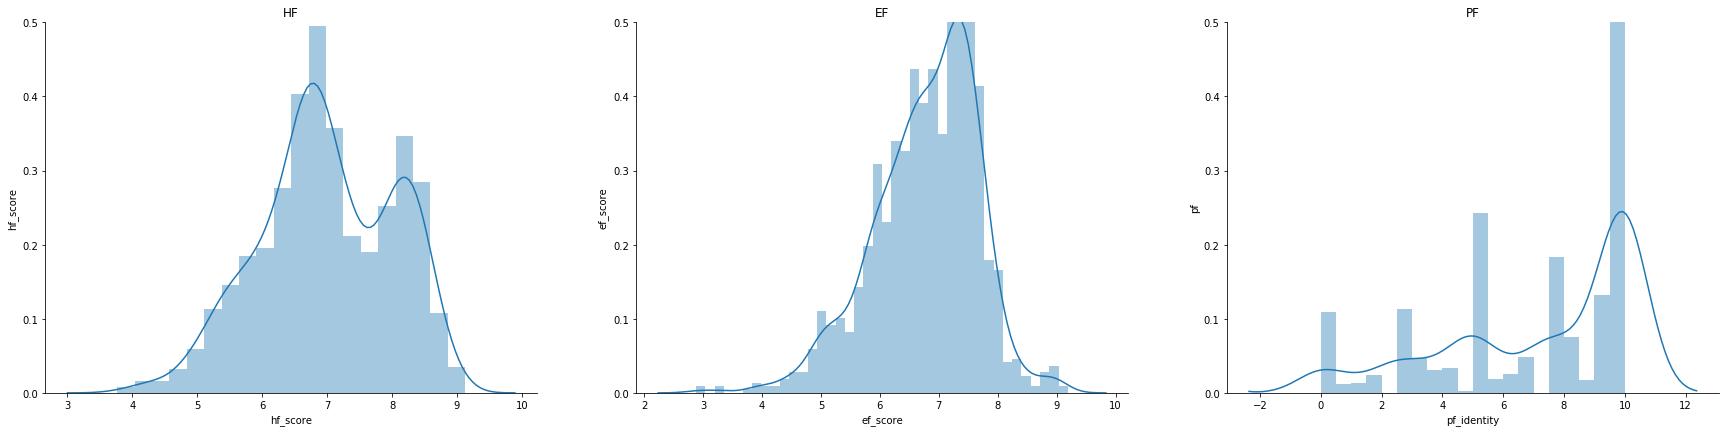

In [205]:
plt.figure(figsize=(30,15))
plt.subplot2grid((2,3),(0,0))
seaborn.distplot(dataset['hf_score'].dropna(), bins=20)
plt.ylabel('hf_score')
seaborn.despine()
plt.ylim(0, 0.5)
plt.title('HF')
plt.subplot2grid((2,3),(0,1))
seaborn.distplot(dataset['ef_score'].dropna(), bins=40)
plt.ylabel('ef_score')
plt.ylim(0, 0.5)
seaborn.despine()
plt.title('EF')
plt.subplot2grid((2,3),(0,2))
seaborn.distplot(dataset['pf_identity'].dropna(), bins=20)
plt.ylabel('pf')
plt.ylim(0, 0.5)
seaborn.despine()
plt.title('PF')

Este grafico nos indica que la poblacion tiene dos comportamientos, es decir que se pueden visualizaar dos normales y la muestra debe tratarse como dos submuestras independientes ya que tienen diferentes caracteristicas y comportamientos. Vemos que la pf y la hf puede ser dividida, no la variable ef. Vamos a ver cuales son las regiones que nos dan este comportamiento para poder separarlas de la muestra.

Text(0.5, 1.0, 'HF')

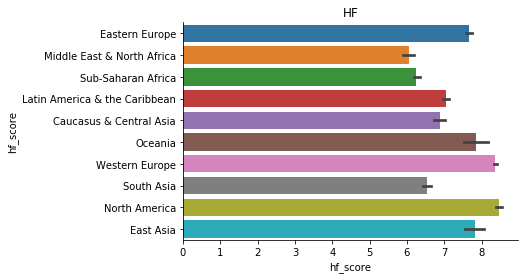

In [214]:
seaborn.barplot(data=dataset, x='hf_score',  y='region')
plt.ylabel('hf_score')
seaborn.despine()
plt.title('HF')

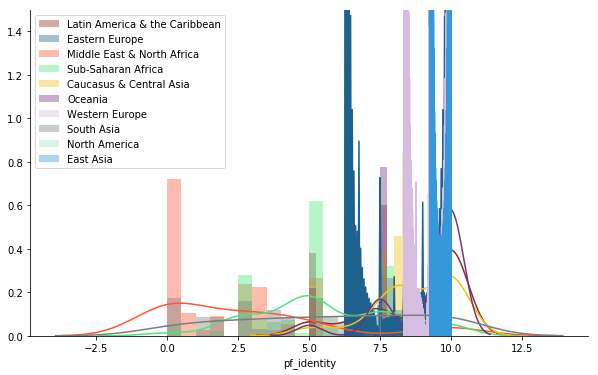

In [223]:
dsLatin=dataset[dataset['region']=='Latin America & the Caribbean']
dsEuro=dataset[dataset['region']=='Eastern Europe']
dsAf=dataset[dataset['region']==  'Middle East & North Africa']
dsSSA=dataset[dataset['region']== 'Sub-Saharan Africa'] 
dsCCA=dataset[dataset['region']== 'Caucasus & Central Asia'] 
dsOc=dataset[dataset['region']==  'Oceania'] 
dsWE=dataset[dataset['region']==  'Western Europe']
dsSA=dataset[dataset['region']==  'South Asia']
dsNA=dataset[dataset['region']==  'North America'] 
dsEA=dataset[dataset['region']==  'East Asia']

plt.figure(figsize=(10,6))
seaborn.distplot(dsLatin['pf_identity'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsEuro['pf_identity'].dropna(), color="#1f618d", label='Eastern Europe', bins=20)
seaborn.distplot(dsAf['pf_identity'].dropna(), color="#FF5733", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['pf_identity'].dropna(), color="#48e876", label='Sub-Saharan Africa', bins=20)
seaborn.distplot(dsCCA['pf_identity'].dropna(), color="#f1c40f", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsOc['pf_identity'].dropna(), color="#6c3483", label='Oceania', bins=20)
seaborn.distplot(dsWE['pf_identity'].dropna(), color="#d7bde2", label='Western Europe', bins=20)
seaborn.distplot(dsSA['pf_identity'].dropna(), color="#7b7d7d", label='South Asia', bins=20)
seaborn.distplot(dsNA['pf_identity'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['pf_identity'].dropna(), color="#3498db", label='East Asia', bins=20)
plt.legend()
plt.ylim(0, 1.5)
seaborn.despine()

En este grafico podemos ver que los valores de mayor frecuencia que separan la muestra son Western Europe y East Asia 

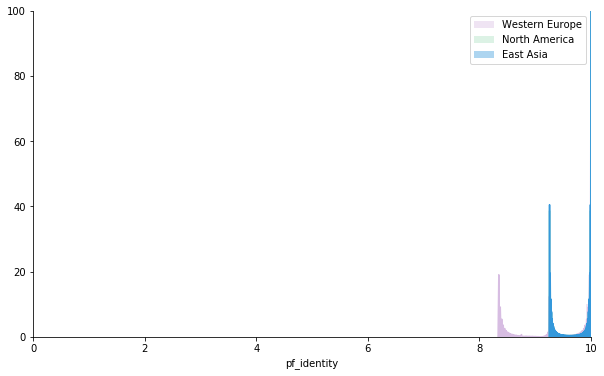

In [240]:
plt.figure(figsize=(10,6))
seaborn.distplot(dsWE['pf_identity'].dropna(), color="#d7bde2", label='Western Europe', bins=20)
seaborn.distplot(dsNA['pf_identity'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['pf_identity'].dropna(), color="#3498db", label='East Asia', bins=20)
plt.legend()
plt.xlim(0,10)
plt.ylim(0, 100)
seaborn.despine()

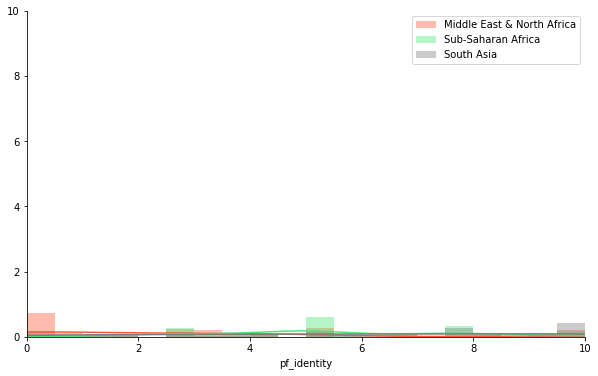

In [248]:
plt.figure(figsize=(10,6))
#seaborn.distplot(dsLatin['pf_identity'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
#seaborn.distplot(dsEuro['pf_identity'].dropna(), color="#1f618d", label='Eastern Europe', bins=20)
seaborn.distplot(dsAf['pf_identity'].dropna(), color="#FF5733", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['pf_identity'].dropna(), color="#48e876", label='Sub-Saharan Africa', bins=20)
#seaborn.distplot(dsCCA['pf_identity'].dropna(), color="#f1c40f", label='Caucasus & Central Asia', bins=20)
#seaborn.distplot(dsOc['pf_identity'].dropna(), color="#6c3483", label='Oceania', bins=20)
seaborn.distplot(dsSA['pf_identity'].dropna(), color="#7b7d7d", label='South Asia', bins=20)

plt.legend()
plt.xlim(0,10)
plt.ylim(0, 10)
seaborn.despine()

Esto nos da la pauta que los valores por debajo de la media se deben eliminar porque son outliers y no valen la pena analizarlos. AHora vemos en la variable hr_source que sucede

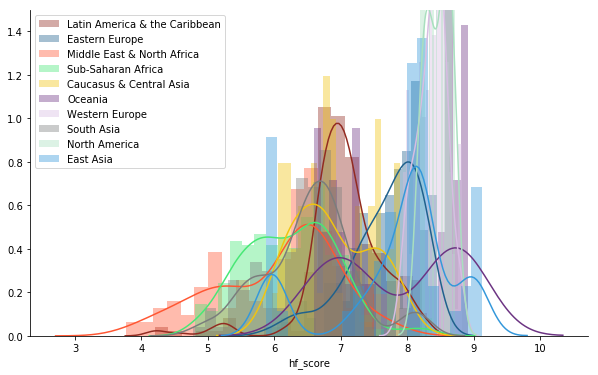

In [226]:
dsLatin=dataset[dataset['region']=='Latin America & the Caribbean']
dsEuro=dataset[dataset['region']=='Eastern Europe']
dsAf=dataset[dataset['region']==  'Middle East & North Africa']
dsSSA=dataset[dataset['region']== 'Sub-Saharan Africa'] 
dsCCA=dataset[dataset['region']== 'Caucasus & Central Asia'] 
dsOc=dataset[dataset['region']==  'Oceania'] 
dsWE=dataset[dataset['region']==  'Western Europe']
dsSA=dataset[dataset['region']==  'South Asia']
dsNA=dataset[dataset['region']==  'North America'] 
dsEA=dataset[dataset['region']==  'East Asia']

plt.figure(figsize=(10,6))
seaborn.distplot(dsLatin['hf_score'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsEuro['hf_score'].dropna(), color="#1f618d", label='Eastern Europe', bins=20)
seaborn.distplot(dsAf['hf_score'].dropna(), color="#FF5733", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['hf_score'].dropna(), color="#48e876", label='Sub-Saharan Africa', bins=20)
seaborn.distplot(dsCCA['hf_score'].dropna(), color="#f1c40f", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsOc['hf_score'].dropna(), color="#6c3483", label='Oceania', bins=20)
seaborn.distplot(dsWE['hf_score'].dropna(), color="#d7bde2", label='Western Europe', bins=20)
seaborn.distplot(dsSA['hf_score'].dropna(), color="#7b7d7d", label='South Asia', bins=20)
seaborn.distplot(dsNA['hf_score'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['hf_score'].dropna(), color="#3498db", label='East Asia', bins=20)
plt.legend()
plt.ylim(0, 1.5)
seaborn.despine()

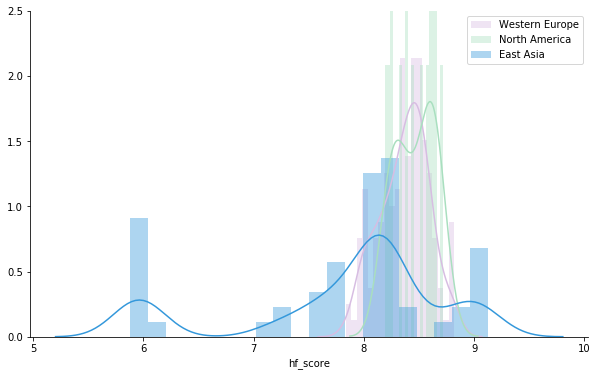

In [253]:
plt.figure(figsize=(10,6))
#seaborn.distplot(dsLatin['hf_score'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsEuro['hf_score'].dropna(), color="#1f618d", label='Eastern Europe', bins=20)
#seaborn.distplot(dsAf['hf_score'].dropna(), color="#FF5733", label='Middle East & North Africa', bins=20)
#seaborn.distplot(dsSSA['hf_score'].dropna(), color="#48e876", label='Sub-Saharan Africa', bins=20)
#seaborn.distplot(dsCCA['hf_score'].dropna(), color="#f1c40f", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsOc['hf_score'].dropna(), color="#6c3483", label='Oceania', bins=20)
seaborn.distplot(dsWE['hf_score'].dropna(), color="#d7bde2", label='Western Europe', bins=20)
#seaborn.distplot(dsSA['hf_score'].dropna(), color="#7b7d7d", label='South Asia', bins=20)
seaborn.distplot(dsNA['hf_score'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['hf_score'].dropna(), color="#3498db", label='East Asia', bins=20)
plt.legend()
plt.ylim(0, 2.5)
seaborn.despine()

En este grafico podemos ver como separar la muestra en dos grandes grupos, los paises con mas grado de libertad de las regiones de europa, este de Asia, Oceania y Norte America,  que casualmente son los paises mejor posicionados economicamente. Y por otro lado nos encontramos con los paises con grado de libertad menor, los siguientes

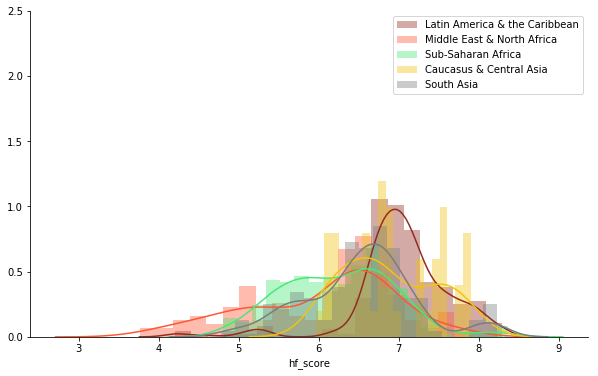

In [255]:
plt.figure(figsize=(10,6))
seaborn.distplot(dsLatin['hf_score'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsAf['hf_score'].dropna(), color="#FF5733", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['hf_score'].dropna(), color="#48e876", label='Sub-Saharan Africa', bins=20)
seaborn.distplot(dsCCA['hf_score'].dropna(), color="#f1c40f", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsSA['hf_score'].dropna(), color="#7b7d7d", label='South Asia', bins=20)
plt.legend()
plt.ylim(0, 2.5)
seaborn.despine()

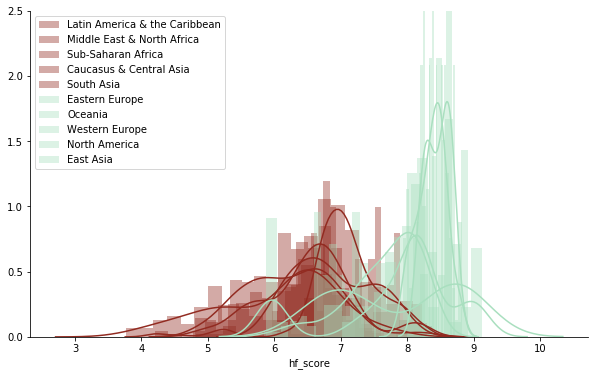

In [256]:
plt.figure(figsize=(10,6))
seaborn.distplot(dsLatin['hf_score'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsAf['hf_score'].dropna(), color="#922b21", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['hf_score'].dropna(), color="#922b21", label='Sub-Saharan Africa', bins=20)
seaborn.distplot(dsCCA['hf_score'].dropna(), color="#922b21", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsSA['hf_score'].dropna(), color="#922b21", label='South Asia', bins=20)

seaborn.distplot(dsEuro['hf_score'].dropna(), color="#a9dfbf", label='Eastern Europe', bins=20)
seaborn.distplot(dsOc['hf_score'].dropna(), color="#a9dfbf", label='Oceania', bins=20)
seaborn.distplot(dsWE['hf_score'].dropna(), color="#a9dfbf", label='Western Europe', bins=20)
seaborn.distplot(dsNA['hf_score'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['hf_score'].dropna(), color="#a9dfbf", label='East Asia', bins=20)

plt.legend()
plt.ylim(0, 2.5)
seaborn.despine()

De esta forma podemos ver los dos grandes grupos, que claramente se diferencian por la situacion economica y ello es lo que los hace tener un comportamiento diferente. A continuacion graficamos la variable ef, de la libertad economica a ver cual es el comportamiento.

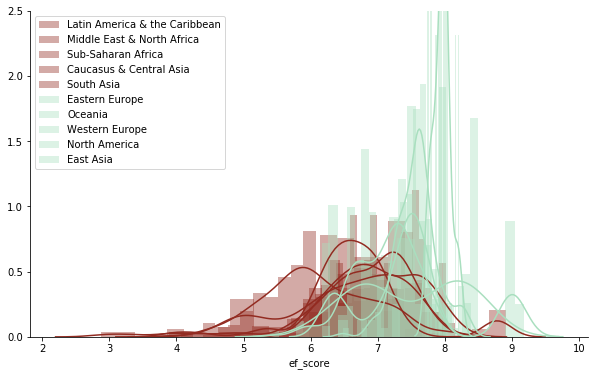

In [257]:
plt.figure(figsize=(10,6))
seaborn.distplot(dsLatin['ef_score'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsAf['ef_score'].dropna(), color="#922b21", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['ef_score'].dropna(), color="#922b21", label='Sub-Saharan Africa', bins=20)
seaborn.distplot(dsCCA['ef_score'].dropna(), color="#922b21", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsSA['ef_score'].dropna(), color="#922b21", label='South Asia', bins=20)

seaborn.distplot(dsEuro['ef_score'].dropna(), color="#a9dfbf", label='Eastern Europe', bins=20)
seaborn.distplot(dsOc['ef_score'].dropna(), color="#a9dfbf", label='Oceania', bins=20)
seaborn.distplot(dsWE['ef_score'].dropna(), color="#a9dfbf", label='Western Europe', bins=20)
seaborn.distplot(dsNA['ef_score'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['ef_score'].dropna(), color="#a9dfbf", label='East Asia', bins=20)

plt.legend()
plt.ylim(0, 2.5)
seaborn.despine()

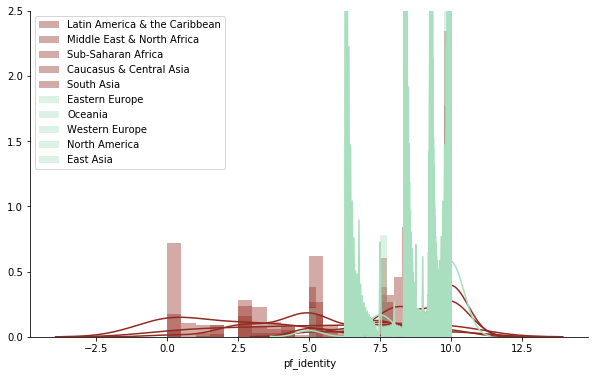

In [260]:
plt.figure(figsize=(10,6))
seaborn.distplot(dsLatin['pf_identity'].dropna(), color="#922b21", label='Latin America & the Caribbean', bins=20)
seaborn.distplot(dsAf['pf_identity'].dropna(), color="#922b21", label='Middle East & North Africa', bins=20)
seaborn.distplot(dsSSA['pf_identity'].dropna(), color="#922b21", label='Sub-Saharan Africa', bins=20)
seaborn.distplot(dsCCA['pf_identity'].dropna(), color="#922b21", label='Caucasus & Central Asia', bins=20)
seaborn.distplot(dsSA['pf_identity'].dropna(), color="#922b21", label='South Asia', bins=20)

seaborn.distplot(dsEuro['pf_identity'].dropna(), color="#a9dfbf", label='Eastern Europe', bins=20)
seaborn.distplot(dsOc['pf_identity'].dropna(), color="#a9dfbf", label='Oceania', bins=20)
seaborn.distplot(dsWE['pf_identity'].dropna(), color="#a9dfbf", label='Western Europe', bins=20)
seaborn.distplot(dsNA['pf_identity'].dropna(), color="#a9dfbf", label='North America', bins=20 )
seaborn.distplot(dsEA['pf_identity'].dropna(), color="#a9dfbf", label='East Asia', bins=20)

plt.legend()
plt.ylim(0, 2.5)
seaborn.despine()

Graficando las tres variables divididas en estos grupos vemos que podemos realizar una separacion de las muestras en dos submuestras para su analisis diferenciado. Pero esto nos indica que las variables nos estan categorizando a la poblacion en dos grandes clusteres.

¿Qué significa tener un puntaje de 4.5? Hay que poner los puntajes de la región en contexto con los datos del resto del mundo.
¿Cuál es la tendencia a lo largo de los años? ¿Estamos mejorando, empeorando?
En este estudio, la libertad se mide con dos estimadores principales: hf_score que hace referencia a Human Freedom, y ef_score que hace referencia a Economic Freedom. Estos dos estimadores, ¿se relacionan de la misma manera con la libertad de identidad?
Inicialmente, en toda exploración de datos tenemos muy poca información a priori sobre el significado de los datos y tenemos que empezar por comprenderlos. Les proponemos los siguientes ejercicios como guía para comenzar esta exploración.